# Comprehension des données 

Le Single-Cell RNA-Seq (ou scRNA-seq) est une technique de séquençage de l'ARN qui permet de mesurer l'expression génique dans des cellules individuelles

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)

#X_train, y_train = get_train_data()
X_test, y_test = get_test_data(
    path="/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers"
)


In [3]:
lab_df = pd.DataFrame({'label': y_train})
lab_df.value_counts(normalize=True)

label       
T_cells_CD8+    0.342
T_cells_CD4+    0.336
Cancer_cells    0.237
NK_cells        0.085
Name: proportion, dtype: float64

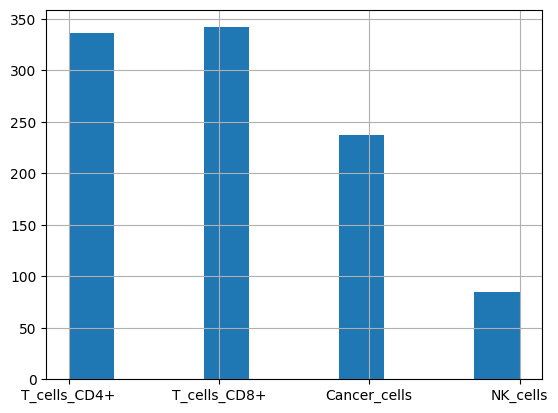

In [4]:
lab_df.label.hist();

Premier problème observé : le nombre de classes n’est pas le même, ce qui peut avoir un impact sur la création et les performances du modèle.

In [5]:
total_genes_counts = X_train.toarray().sum(axis=0)
total_cell_counts = X_train.toarray().sum(axis=1)
total_cells = X_train.shape[0]
print("Nombre total de cellules :", total_cells)

total_genes = X_train.shape[1]
print("Nombre total de gènes :", total_genes)



Nombre total de cellules : 1000
Nombre total de gènes : 13551


In [6]:
X_dense = X_train.toarray()

summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print(summary)


total_values = X_train.shape[0] * X_train.shape[1]  # nombre total de cases
num_nonzero = X_train.count_nonzero()                # nombre de valeurs non nulles
num_zeros = total_values - num_nonzero              # nombre de zéros
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%


In [7]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [8]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary_raw = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary_raw)

# =====================================
# 2️⃣ Library Size Normalization
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

# Facteur recommandé scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

summary_lib = pd.DataFrame({
    "min": [X_libnorm.min()],
    "max": [X_libnorm.max()],
    "mean": [X_libnorm.mean()],
    "median": [np.median(X_libnorm)],
    "std": [X_libnorm.std()],
    "sparsity": [(X_libnorm == 0).sum() / X_libnorm.size]
})
print("\nRésumé après Library Size Normalization :")
print(summary_lib)

# =====================================
# 3️⃣ Option : log1p (facultatif)
# =====================================
X_log = np.log1p(X_libnorm)  # si tu veux garder les valeurs brutes, saute cette étape

# =====================================
# 4️⃣ Normalisation L1 par cellule (somme = 1)
# =====================================
# Choisis la version à utiliser : log ou pas
X_final = X_log  # ou X_libnorm si tu ne veux pas de log
X_sum1 = X_final / X_final.sum(axis=1, keepdims=True)

# Vérification
print("\nSomme par cellule (les 5 premières) :")
print(X_sum1.sum(axis=1)[:5])

# =====================================
# 5️⃣ Résumé final
# =====================================
summary_final = pd.DataFrame({
    "min": [X_sum1.min()],
    "max": [X_sum1.max()],
    "mean": [X_sum1.mean()],
    "median": [np.median(X_sum1)],
    "std": [X_sum1.std()],
    "sparsity": [(X_sum1 == 0).sum() / X_sum1.size]
})
print("\nRésumé final après L1 par cellule :")
print(summary_final)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478

Résumé après Library Size Normalization :
   min          max      mean  median       std  sparsity
0  0.0  6333.998535  0.737953     0.0  9.128844  0.919478

Somme par cellule (les 5 premières) :
[1.        0.9999999 1.        0.9999999 1.       ]

Résumé final après L1 par cellule :
   min       max      mean  median       std  sparsity
0  0.0  0.015987  0.000074     0.0  0.000339  0.919478


# Problème : le nombre de gènes

In [9]:
import numpy as np
import pandas as pd

# Conversion en matrice dense
X_dense = X_train.toarray()

# ==============================
# 1️⃣ Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes :")
print(summary)

# Sparsité globale
total_values = X_train.shape[0] * X_train.shape[1]
num_nonzero = X_train.count_nonzero()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# =====================================
# 2️⃣ Library Size Normalization (CORRIGÉE)
# =====================================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1

# Facteur standard scRNA-seq : 10 000
X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation (étape clé)
X_log = np.log1p(X_libnorm)

# =====================================
# 3️⃣ Résumé FINAL (sur X_log)
# =====================================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé après Library Size + log1p :")
print(summary_log)


Résumé des données brutes :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478
Nombre total de zéros : 12,459,844
Proportion de zéros (sparsité) : 91.95%

Résumé après Library Size + log1p :
   min       max     mean  median       std  sparsity
0  0.0  8.753845  0.13638     0.0  0.532629  0.919478


In [10]:
num_colonnes = X_train.shape[1]
print("Nombre de colonnes :", num_colonnes)


Nombre de colonnes : 13551


In [11]:
import pandas as pd

# Conversion en dense
X_dense = X_train.toarray()

# Créer le DataFrame
df = pd.DataFrame(X_dense)

# Correction ici
df["label"] = y_train.to_numpy()  

# Séparer chaque classe
df_cancer = df[df['label'] == 'Cancer_cells'].drop(columns=['label'])
df_nk     = df[df['label'] == 'NK_cells'].drop(columns=['label'])
df_cd4    = df[df['label'] == 'T_cells_CD4+'].drop(columns=['label'])
df_cd8    = df[df['label'] == 'T_cells_CD8+'].drop(columns=['label'])

# Vérification
print("Cancer cells :", df_cancer.shape)
print("NK cells :", df_nk.shape)
print("T_cells_CD4+ :", df_cd4.shape)
print("T_cells_CD8+ :", df_cd8.shape)



Cancer cells : (237, 13551)
NK cells : (85, 13551)
T_cells_CD4+ : (336, 13551)
T_cells_CD8+ : (342, 13551)


In [12]:
import numpy as np
import pandas as pd

# df_cancer : DataFrame des cellules Cancer_cells

# Résumé statistique
summary = pd.DataFrame({
    "min": [df_cancer.min().min()],
    "max": [df_cancer.max().max()],
    "mean": [df_cancer.mean().mean()],
    "median": [np.median(df_cancer.values)],
    "std": [df_cancer.stack().std()],
    "sparsity": [(df_cancer == 0).sum().sum() / df_cancer.size]
})
print("Résumé statistique :")
print(summary)

# Nombre total de zéros
total_values = df_cancer.shape[0] * df_cancer.shape[1]
num_nonzero = (df_cancer.values != 0).sum()
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")


Résumé statistique :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245546  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


6       559.0
7      7265.0
12    30548.0
13      525.0
14      546.0
dtype: float32


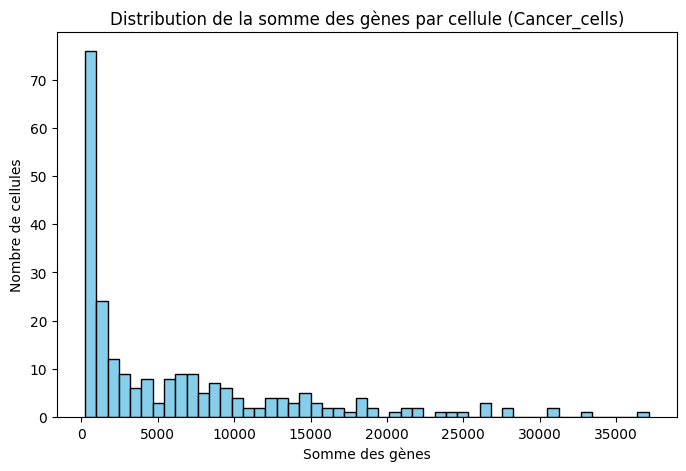

In [13]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cancer.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (Cancer_cells)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()


Médiane des UMI par cellule : 1995.0


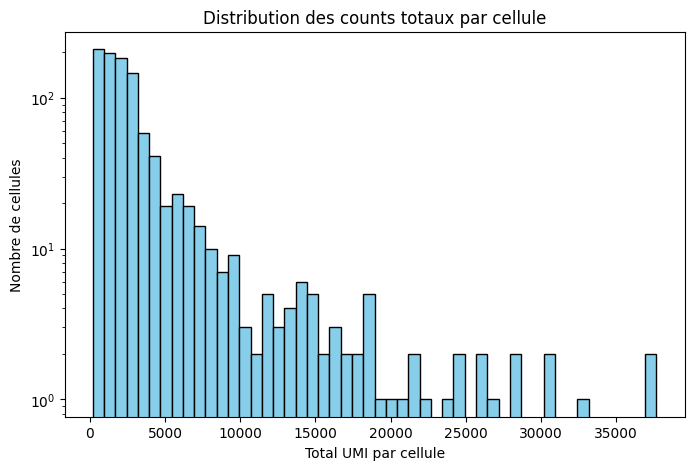

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Conversion en dense
X_dense = X_train.toarray()

# DataFrame
df = pd.DataFrame(X_dense)

# 1️⃣ Somme des gènes par cellule (total UMI counts)
gene_sums = df.sum(axis=1)  

# Médiane des UMI par cellule
median_umi = np.median(gene_sums)
print("Médiane des UMI par cellule :", median_umi)


# 2️⃣ Histogramme de la distribution des counts par cellule
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des counts totaux par cellule")
plt.xlabel("Total UMI par cellule")
plt.ylabel("Nombre de cellules")
plt.yscale('log')  # optionnel : échelle log pour mieux visualiser les queues
plt.show()



In [15]:
import pandas as pd

# Somme des gènes par cellule
gene_sums = df.sum(axis=1)

# Calcul des statistiques
stats_dict = {
    "Statistique": [
        "Moyenne", 
        "Médiane", 
        "Variance",         # ajout de la variance
        "Écart-type", 
        "Minimum", 
        "Maximum"
    ],
    "Valeur (UMI par cellule)": [
        float(gene_sums.mean()),
        float(gene_sums.median()),
        float(gene_sums.var()),    # variance
        float(gene_sums.std()),
        float(gene_sums.min()),
        float(gene_sums.max())
    ]
}

# Création du DataFrame
stats_table = pd.DataFrame(stats_dict)

# Arrondi à 2 décimales
stats_table["Valeur (UMI par cellule)"] = stats_table["Valeur (UMI par cellule)"].round(2)

# Affichage joli
print(stats_table)


  Statistique  Valeur (UMI par cellule)
0     Moyenne                   3334.09
1     Médiane                   1995.00
2    Variance               20290700.00
3  Écart-type                   4504.52
4     Minimum                    186.00
5     Maximum                  37679.00


Médiane des UMI par ggène  : 54.0


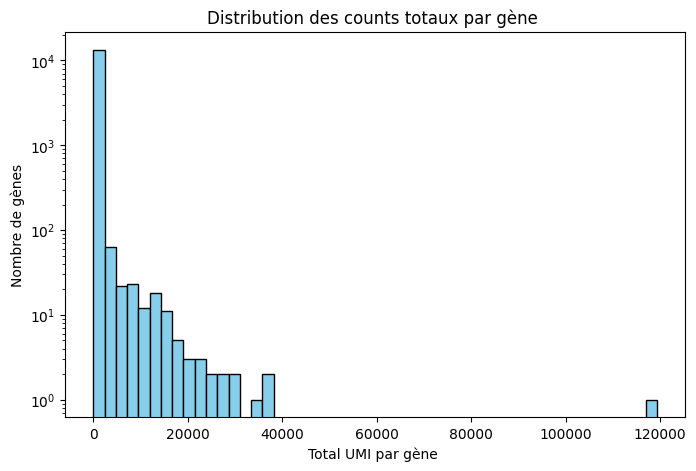

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Conversion en dense
X_dense = X_train.toarray()

# DataFrame
df = pd.DataFrame(X_dense)

# 1️⃣ Somme des gènes par cellule (total UMI counts)
gene_sums = df.sum(axis=0)  

# Médiane des UMI par cellule
median_umi = np.median(gene_sums)
print("Médiane des UMI par ggène  :", median_umi)


# 2️⃣ Histogramme de la distribution des counts par cellule
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution des counts totaux par gène ")
plt.xlabel("Total UMI par gène ")
plt.ylabel("Nombre de gènes")
plt.yscale('log')  # optionnel : échelle log pour mieux visualiser les queues
plt.show()



In [17]:
import pandas as pd

# Somme des counts par gène
gene_sums = df.sum(axis=0)  # axis=0 = somme sur toutes les cellules → total par gène

# Calcul des statistiques
stats_dict = {
    "Statistique": [
        "Moyenne", 
        "Médiane", 
        "Variance",       
        "Écart-type", 
        "Minimum", 
        "Maximum",
        "25ème percentile"   # ajout du premier quartile
    ],
    "Valeur (Total UMI par gène)": [
        float(gene_sums.mean()),
        float(gene_sums.median()),
        float(gene_sums.var()),    
        float(gene_sums.std()),
        float(gene_sums.min()),
        float(gene_sums.max()),
        float(gene_sums.quantile(0.25))  # calcul du premier quartile
    ]
}

# Création du DataFrame
stats_table = pd.DataFrame(stats_dict)

# Arrondi à 2 décimales
stats_table["Valeur (Total UMI par gène)"] = stats_table["Valeur (Total UMI par gène)"].round(2)

# Affichage joli
print(stats_table)



        Statistique  Valeur (Total UMI par gène)
0           Moyenne                       246.04
1           Médiane                        54.00
2          Variance                   2743267.00
3        Écart-type                      1656.28
4           Minimum                         1.00
5           Maximum                    119358.00
6  25ème percentile                        21.00


In [18]:
import pandas as pd

# Somme des counts par gène
gene_sums = df.sum(axis=0)  # axis=0 = total UMI par gène

# Statistiques descriptives
mean_val = gene_sums.mean()
median_val = gene_sums.median()
variance_val = gene_sums.var()
std_val = gene_sums.std()
min_val = gene_sums.min()
max_val = gene_sums.max()
q25 = gene_sums.quantile(0.25)
q75 = gene_sums.quantile(0.75)

# Catégories
low = (gene_sums <= q25).sum()
medium = ((gene_sums > q25) & (gene_sums < q75)).sum()
high = (gene_sums >= q75).sum()
total_genes = len(gene_sums)

# Pourcentages
low_pct = low / total_genes * 100
medium_pct = medium / total_genes * 100
high_pct = high / total_genes * 100

# Création du tableau
stats_dict = {
    "Statistique": [
        "Moyenne", "Médiane", "Variance", "Écart-type", "Minimum", "Maximum",
        "1er Quartile (Q1)", "3ème Quartile (Q3)",
        "Gènes faiblement exprimés", "Gènes modérément exprimés", "Gènes fortement exprimés"
    ],
    "Valeur": [
        round(mean_val,2), round(median_val,2), round(variance_val,2), round(std_val,2),
        int(min_val), int(max_val),
        round(q25,2), round(q75,2),
        f"{low} ({low_pct:.2f}%)",
        f"{medium} ({medium_pct:.2f}%)",
        f"{high} ({high_pct:.2f}%)"
    ]
}

# Création DataFrame
stats_table = pd.DataFrame(stats_dict)

# Affichage joli
print(stats_table)




                  Statistique         Valeur
0                     Moyenne     246.039993
1                     Médiane           54.0
2                    Variance      2743267.0
3                  Écart-type    1656.280029
4                     Minimum              1
5                     Maximum         119358
6           1er Quartile (Q1)           21.0
7          3ème Quartile (Q3)          130.0
8   Gènes faiblement exprimés  3480 (25.68%)
9   Gènes modérément exprimés  6665 (49.18%)
10   Gènes fortement exprimés  3406 (25.13%)


Résumé des données brutes (Cancer_cells) :
   min     max      mean  median       std  sparsity
0  0.0  3260.0  0.472413     0.0  6.245545  0.875973
Nombre total de zéros : 2,813,265
Proportion de zéros (sparsité) : 87.60%


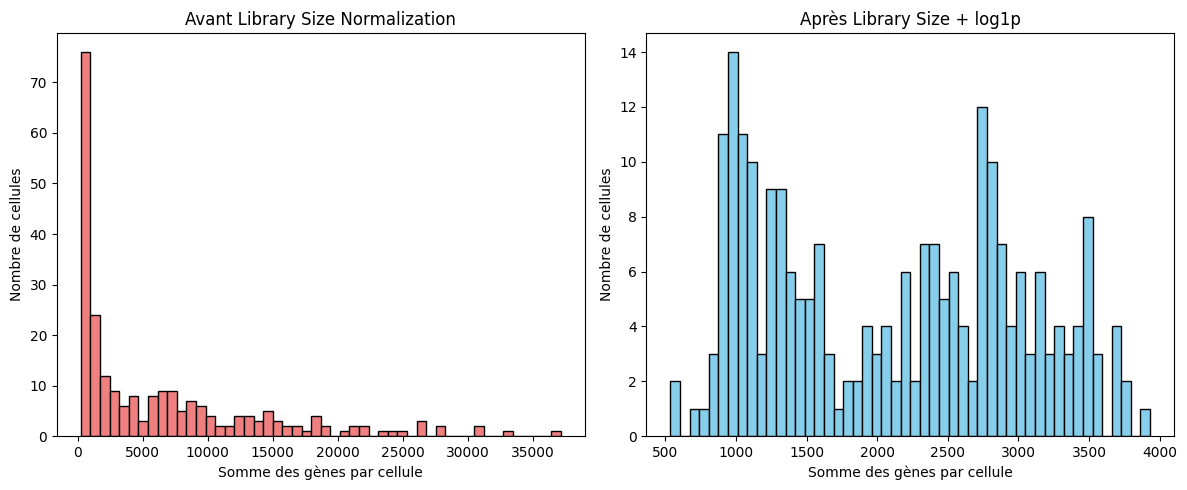


Résumé après Library Size + log1p (Cancer_cells) :
   min       max      mean  median       std  sparsity
0  0.0  8.753845  0.154945     0.0  0.522664  0.875973


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : Cancer_cells
# -----------------------------
X_dense = df_cancer.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (Cancer_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightcoral', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (Cancer_cells) :")
print(summary_log)


8     1946.0
21    3251.0
35     881.0
39    6636.0
85    1355.0
dtype: float32


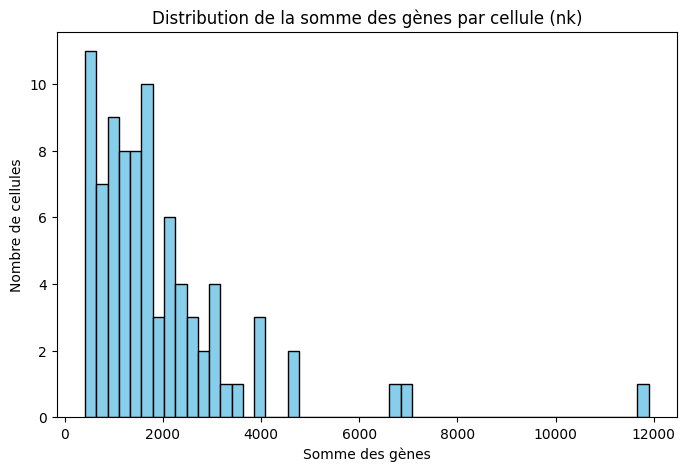

In [20]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_nk.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (nk)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (NK_cells) :
   min    max      mean  median       std  sparsity
0  0.0  387.0  0.143083     0.0  1.593363  0.937521
Nombre total de zéros : 1,079,870
Proportion de zéros (sparsité) : 93.75%


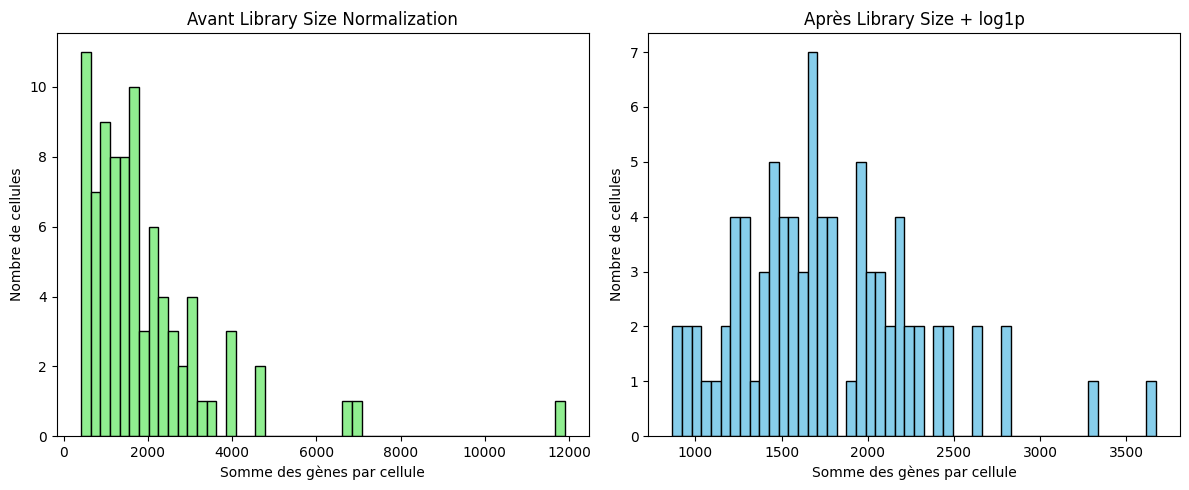


Résumé après Library Size + log1p (NK_cells) :
   min       max      mean  median       std  sparsity
0  0.0  7.492904  0.129816     0.0  0.544178  0.937521


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : NK_cells
# -----------------------------
X_dense = df_nk.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (NK_cells) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightgreen', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (NK_cells) :")
print(summary_log)


0    14123.0
1     4867.0
2     1307.0
3      551.0
5     1952.0
dtype: float32


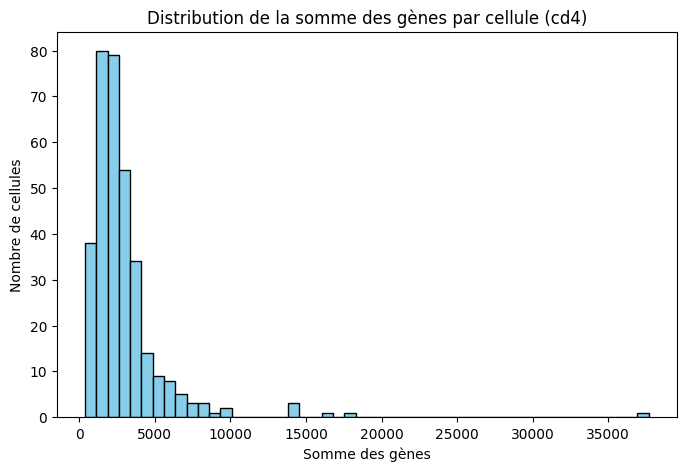

In [22]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd4.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd4)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD4+) :
   min    max      mean  median       std  sparsity
0  0.0  751.0  0.218655     0.0  2.532722  0.924209
Nombre total de zéros : 4,208,050
Proportion de zéros (sparsité) : 92.42%


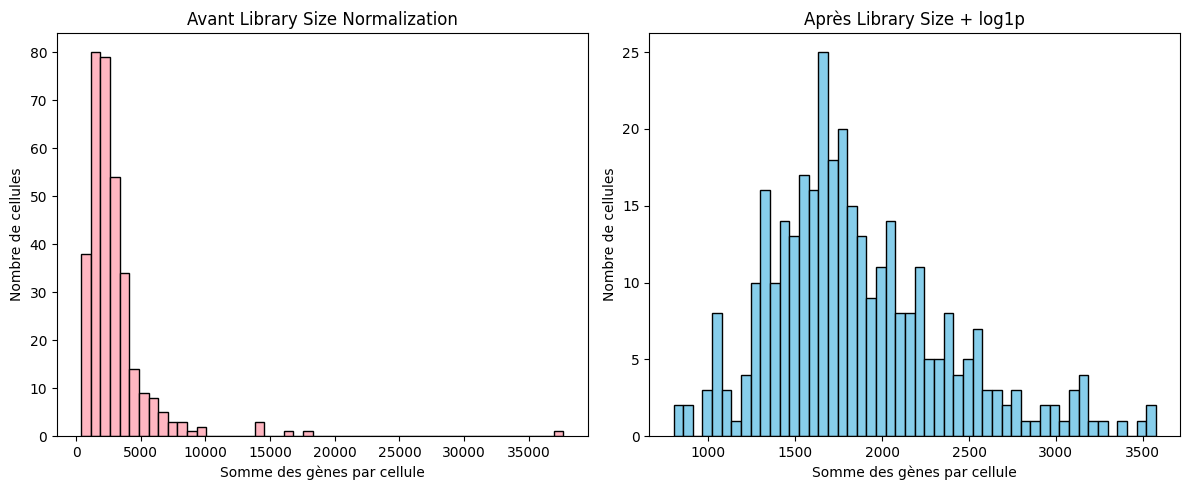


Résumé après Library Size + log1p (T_cells_CD4+) :
   min       max      mean  median       std  sparsity
0  0.0  8.194632  0.137087     0.0  0.533972  0.924209


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD4+
# -----------------------------
X_dense = df_cd4.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD4+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightpink', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD4+) :")
print(summary_log)


4     1118.0
9     2947.0
22     328.0
24    2878.0
29    1314.0
dtype: float32


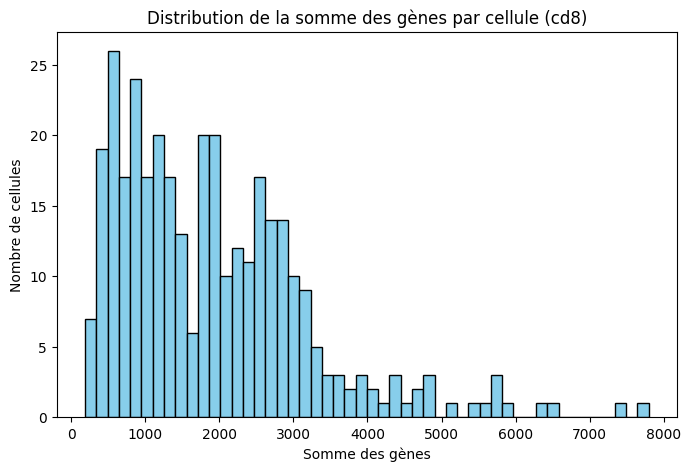

In [24]:
import matplotlib.pyplot as plt

# 1️⃣ Somme des gènes par cellule
gene_sums = df_cd8.sum(axis=1)  # axis=1 : somme sur les colonnes (gènes)

# Afficher les 5 premières valeurs
print(gene_sums.head())

# 2️⃣ Histogramme
plt.figure(figsize=(8,5))
plt.hist(gene_sums, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution de la somme des gènes par cellule (cd8)")
plt.xlabel("Somme des gènes")
plt.ylabel("Nombre de cellules")
plt.show()

Résumé des données brutes (T_cells_CD8+) :
   min    max     mean  median       std  sparsity
0  0.0  458.0  0.14166     0.0  1.612004  0.940493
Nombre total de zéros : 4,358,659
Proportion de zéros (sparsité) : 94.05%


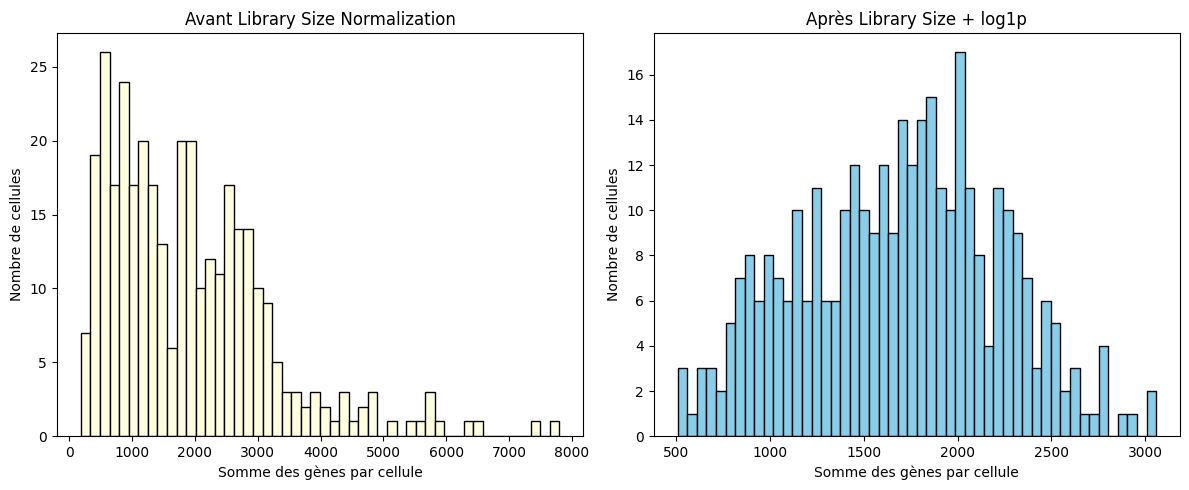


Résumé après Library Size + log1p (T_cells_CD8+) :
   min       max      mean  median       std  sparsity
0  0.0  8.042416  0.124453     0.0  0.534876  0.940493


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Préparer les données : T_cells_CD8+
# -----------------------------
X_dense = df_cd8.values.astype(float)  # convertir en float si nécessaire

# ==============================
# Résumé des données brutes
# ==============================
summary = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})
print("Résumé des données brutes (T_cells_CD8+) :")
print(summary)

# Sparsité globale
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

print(f"Nombre total de zéros : {num_zeros:,}")
print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# ==============================
# Histogramme avant normalisation
# ==============================
sums_before = X_dense.sum(axis=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(sums_before, bins=50, color='lightyellow', edgecolor='black')
plt.title("Avant Library Size Normalization")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

# ==============================
# 2️⃣ Library Size Normalization
# ==============================
library_size = X_dense.sum(axis=1, keepdims=True)
library_size[library_size == 0] = 1  # éviter division par zéro

X_libnorm = (X_dense / library_size) * 1e4

# Log-normalisation
X_log = np.log1p(X_libnorm)

# ==============================
# Histogramme après normalisation
# ==============================
sums_after = X_log.sum(axis=1)
plt.subplot(1,2,2)
plt.hist(sums_after, bins=50, color='skyblue', edgecolor='black')
plt.title("Après Library Size + log1p")
plt.xlabel("Somme des gènes par cellule")
plt.ylabel("Nombre de cellules")

plt.tight_layout()
plt.show()

# ==============================
# 3️⃣ Résumé FINAL après normalisation
# ==============================
summary_log = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})
print("\nRésumé après Library Size + log1p (T_cells_CD8+) :")
print(summary_log)


In [43]:
import pandas as pd
import numpy as np

# Supposons que les colonnes de df_* sont les gènes
gene_names = df_cancer.columns

def top_genes(df_class, top_n=20):
    """
    Renvoie les top_n gènes les plus exprimés en moyenne dans cette classe.
    """
    mean_per_gene = df_class.mean(axis=0)  # moyenne par gène
    top_genes = mean_per_gene.sort_values(ascending=False).head(top_n)
    return top_genes

# Top gènes pour chaque classe
top_cancer = top_genes(df_cancer)
top_nk     = top_genes(df_nk)
top_cd4    = top_genes(df_cd4)
top_cd8   = top_genes(df_cd8)

# Affichage
print("Top gènes Cancer_cells :")
print(top_cancer)


Top gènes Cancer_cells :
6340     155.485229
6981      91.924049
6982      75.860756
6983      61.721519
4256      57.860760
9792      55.489452
4257      55.130802
9783      44.995781
9815      43.632912
9742      43.059071
9747      40.919830
3371      40.894516
9789      40.405064
6987      40.008438
9825      39.628693
4352      37.856541
9768      36.582279
11839     36.265823
6979      35.189873
9941      32.413502
dtype: float32


In [27]:
print("\nTop gènes NK_cells :")
print(top_nk)


Top gènes NK_cells :
6340     88.705879
1017     38.352940
11841    28.317648
6981     17.905882
6983     16.694118
           ...    
11092     0.470588
1233      0.470588
8777      0.470588
7262      0.470588
939       0.470588
Length: 500, dtype: float32


In [28]:
print("\nTop gènes T_cells_CD4+ :")
print(top_cd4)


Top gènes T_cells_CD4+ :
6340     131.872025
1017      50.443451
11841     45.303570
3371      31.562500
9825      29.735119
            ...    
1310       0.657738
12680      0.654762
8697       0.654762
1898       0.654762
9368       0.651786
Length: 500, dtype: float32


In [29]:
print("\nTop gènes T_cells_CD8+ :")
print(top_cd8)


Top gènes T_cells_CD8+ :
6340     89.646202
1017     37.865498
11841    33.470760
6981     17.991228
9825     17.467836
           ...    
8538      0.459064
11787     0.456140
1490      0.456140
10127     0.456140
11548     0.456140
Length: 500, dtype: float32


In [30]:
# Top gènes T_cells_CD4+ et T_cells_CD8+ (juste les indices/gènes)
top_cd4_genes = [6340, 1017, 11841, 3371, 9825, 9792, 170, 9742, 6981, 9747,
                 9783, 9815, 9808, 6982, 9816, 9765, 9771, 9770, 11839, 9748]

top_cd8_genes = [6340, 1017, 11841, 6981, 9825, 170, 9792, 9742, 3371, 6982,
                 5000, 9747, 6983, 9808, 9783, 9765, 9816, 9815, 9812, 9793]

# 🔹 Gènes similaires (présents dans les deux)
genes_similaires = list(set(top_cd4_genes).intersection(top_cd8_genes))

# 🔹 Gènes différents (présents seulement dans CD4 ou CD8)
genes_diff_cd4 = list(set(top_cd4_genes) - set(top_cd8_genes))
genes_diff_cd8 = list(set(top_cd8_genes) - set(top_cd4_genes))

print("Gènes similaires :")
print(sorted(genes_similaires))

print("\nGènes spécifiques à CD4+ :")
print(sorted(genes_diff_cd4))

print("\nGènes spécifiques à CD8+ :")
print(sorted(genes_diff_cd8))



Gènes similaires :
[170, 1017, 3371, 6340, 6981, 6982, 9742, 9747, 9765, 9783, 9792, 9808, 9815, 9816, 9825, 11841]

Gènes spécifiques à CD4+ :
[9748, 9770, 9771, 11839]

Gènes spécifiques à CD8+ :
[5000, 6983, 9793, 9812]


In [31]:
import pandas as pd
from collections import Counter

# -----------------------------
# 1️⃣ Sélection des gènes les plus exprimés (top 20)
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(20)
top_nk_filtered = top_nk.sort_values(ascending=False).head(20)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(20)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(20)

# -----------------------------
# 2️⃣ Supprimer les gènes communs à plusieurs catégories
# -----------------------------
all_genes = [
    set(top_cancer_filtered.index),
    set(top_nk_filtered.index),
    set(top_cd4_filtered.index),
    set(top_cd8_filtered.index)
]

gene_counts = Counter([gene for genes in all_genes for gene in genes])

# Garder uniquement les gènes présents dans une seule catégorie
selected_genes_unique = [gene for gene, count in gene_counts.items() if count == 1]

# Filtrer chaque catégorie pour ne garder que les gènes uniques
top_cancer_unique = [g for g in top_cancer_filtered.index if g in selected_genes_unique]
top_nk_unique = [g for g in top_nk_filtered.index if g in selected_genes_unique]
top_cd4_unique = [g for g in top_cd4_filtered.index if g in selected_genes_unique]
top_cd8_unique = [g for g in top_cd8_filtered.index if g in selected_genes_unique]

# -----------------------------
# 3️⃣ Créer le nouveau DataFrame filtré
# -----------------------------
selected_genes_final = set(top_cancer_unique + top_nk_unique + top_cd4_unique + top_cd8_unique)
df_selected = pd.concat([df_cancer, df_nk, df_cd4, df_cd8])
df_selected = df_selected.loc[:, df_selected.columns.intersection(selected_genes_final)]

print(f"\nNombre total de gènes sélectionnés : {len(selected_genes_final)}")
print("\nDimensions du nouveau jeu de données filtré :")
print(df_selected.shape)



Nombre total de gènes sélectionnés : 15

Dimensions du nouveau jeu de données filtré :
(1000, 15)


In [44]:
import pandas as pd

# -----------------------------
# Sélection des 20 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(50)
top_nk_filtered = top_nk.sort_values(ascending=False).head(50)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(50)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(50)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Afficher la liste des gènes pour chaque catégorie
df_genes


,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+
4352,1,0,0,0
9792,1,1,1,1
11841,0,1,1,1
6979,1,1,0,0
6340,1,1,1,1
6981,1,1,1,1
6982,1,1,1,1
6983,1,1,0,1
5000,0,1,0,1
4999,0,1,0,0


In [42]:
import pandas as pd

# -----------------------------
# Sélection des 100 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(20)
top_nk_filtered = top_nk.sort_values(ascending=False).head(20)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(20)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(20)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# Ajouter une colonne 'Total' qui est la somme des lignes
df_genes['Total'] = df_genes.sum(axis=1)

# Afficher le DataFrame
df_genes



,Cancer_cells,NK_cells,T_cells_CD4+,T_cells_CD8+,Total
4352,1,0,0,0,1
9792,1,1,1,1,4
11841,0,1,1,1,3
6979,1,1,0,0,2
6340,1,1,1,1,4
6981,1,1,1,1,4
6982,1,1,1,1,4
6983,1,1,0,1,3
5000,0,1,0,1,2
4999,0,1,0,0,1


In [34]:
import pandas as pd

# -----------------------------
# Sélection des 200 gènes les plus exprimés
# -----------------------------
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(200)
top_nk_filtered = top_nk.sort_values(ascending=False).head(200)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(200)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(200)

# -----------------------------
# Créer un DataFrame pour afficher les gènes
# -----------------------------
# Créer une table avec des cellules vides si un gène n'est pas dans une catégorie
genes_all = list(set(top_cancer_filtered.index).union(top_nk_filtered.index, top_cd4_filtered.index, top_cd8_filtered.index))

# Créer un DataFrame avec 1 si le gène est présent dans une catégorie, sinon 0
data = {
    'Cancer_cells': [1 if gene in top_cancer_filtered.index else 0 for gene in genes_all],
    'NK_cells': [1 if gene in top_nk_filtered.index else 0 for gene in genes_all],
    'T_cells_CD4+': [1 if gene in top_cd4_filtered.index else 0 for gene in genes_all],
    'T_cells_CD8+': [1 if gene in top_cd8_filtered.index else 0 for gene in genes_all]
}

# Créer le DataFrame
df_genes = pd.DataFrame(data, index=genes_all)

# -----------------------------
# Ajouter la colonne 'Total' qui somme les lignes
# -----------------------------
df_genes['Total'] = df_genes.sum(axis=1)

# -----------------------------
# Extraire les gènes dont la colonne 'Total' est égale à 1
# -----------------------------
genes_total_1 = df_genes[df_genes['Total'] == 1].index.tolist()

# Afficher la liste des gènes avec total = 1
print("Liste des gènes dont le total est égal à 1 :")
print(genes_total_1)


Liste des gènes dont le total est égal à 1 :
[8711, 12297, 6673, 6701, 559, 1598, 1601, 4692, 2657, 6246, 6252, 633, 635, 636, 5243, 7293, 11385, 7292, 8314, 5242, 6271, 5775, 4752, 10896, 5219, 4813, 10908, 5277, 12459, 2733, 8878, 12465, 2653, 4792, 5817, 5818, 5821, 11966, 4286, 4804, 11467, 11468, 5343, 5858, 5859, 5864, 10476, 4854, 9996, 5956, 1825, 1828, 2343, 3364, 5147, 5951, 5156, 1892, 8576, 6531, 10116, 11143, 1934, 5007, 7054, 5012, 5013, 11165, 1949, 421, 943, 5051, 12741, 10185, 5076, 2525, 2526, 2527, 2528, 3552, 2530, 1012, 12277, 12790]


In [35]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-4)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
           # ("scaler", StandardScaler(with_mean=True, with_std=True)),
           # ("select", SelectKBest(
            #    score_func=f_classif,
             #   k=2000  #  à ajuster (1000–5000)
            #)),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [36]:
# Gènes ayant un total de 1
genes_total_1 = [9779, 9814, 2152, 8568, 635, 636, 1937, 5015, 7331, 10177, 
                 4801, 10955, 9935, 9940, 9941, 4567, 2779, 2528, 9763, 12286]

# Vérifier que les indices des gènes sont valides dans X_train
valid_genes = [gene for gene in genes_total_1 if gene < X_train.shape[1]]  # Assurez-vous que les indices sont dans la plage de colonnes de X_train

# Si tous les gènes sont valides, vous pouvez sélectionner ces colonnes
X_train_selected = X_train[:, valid_genes]  # Sélectionner les colonnes correspondant aux indices valides

# Si X_train est une matrice sparse, convertissez-la en DataFrame pour une meilleure lisibilité
import pandas as pd
X_train_selected_df = pd.DataFrame(X_train_selected.toarray())  # Conversion en DataFrame pour une meilleure compréhension

# Vérifiez les dimensions de X_train_selected
print(f"Dimensions de X_train_selected : {X_train_selected_df.shape}")


Dimensions de X_train_selected : (1000, 20)


# New 

In [37]:
type(X_train)

scipy.sparse._csr.csr_matrix

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


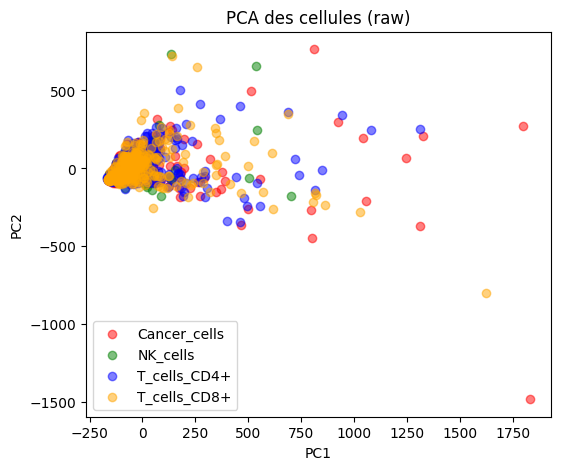

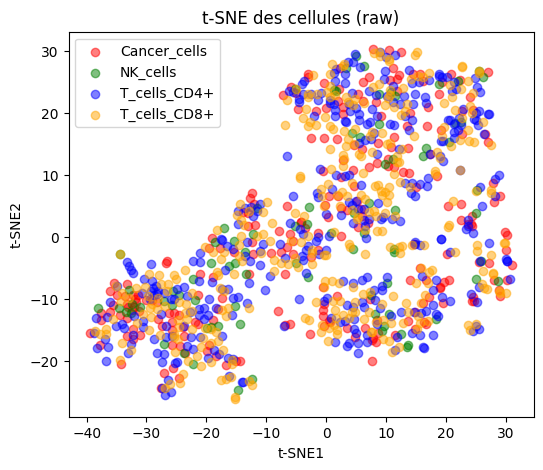

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


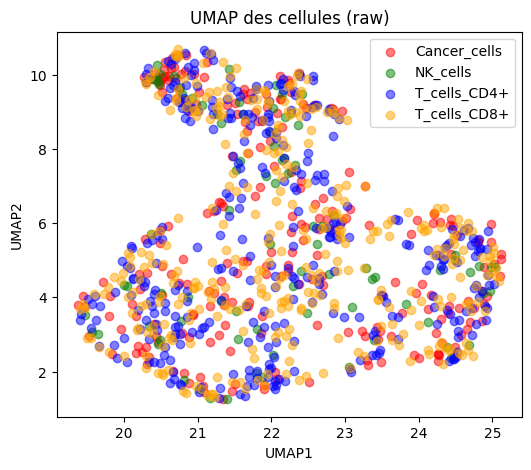

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.sparse import vstack

# -----------------------------
# 1️⃣ Convertir X_train en dense
# -----------------------------
X_dense = X_train.toarray() 
 # si la matrice est trop grosse, utiliser X_train directement

# -----------------------------
# 2️⃣ Créer les labels
# -----------------------------
labels = np.array(
    ['Cancer_cells'] * df_cancer.shape[0] +
    ['NK_cells'] * df_nk.shape[0] +
    ['T_cells_CD4+'] * df_cd4.shape[0] +
    ['T_cells_CD8+'] * df_cd8.shape[0]
)

# Vérification
assert X_dense.shape[0] == len(labels), "Nombre de labels != nombre de cellules"

colors = {'Cancer_cells':'red', 'NK_cells':'green', 'T_cells_CD4+':'blue', 'T_cells_CD8+':'orange'}

# -----------------------------
# 3️⃣ PCA
# -----------------------------
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("PCA des cellules (raw)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# -----------------------------
# 4️⃣ t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_tsne[idx,0], X_tsne[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("t-SNE des cellules (raw)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ UMAP
# -----------------------------
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_dense)

plt.figure(figsize=(6,5))
for cls in np.unique(labels):
    idx = labels == cls
    plt.scatter(X_umap[idx,0], X_umap[idx,1], label=cls, color=colors[cls], alpha=0.5)
plt.title("UMAP des cellules (raw)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.show()


In [39]:
import numpy as np

moyenne = np.mean(X_log, axis=0)
mediane = np.median(X_log, axis=0)

import pandas as pd

stats = pd.DataFrame({
    "moyenne": moyenne,
    "mediane": mediane
})

mask = moyenne >= 0.1

X_filtered = X_dense[:, mask]
stats_filtered = stats[mask]

print("Avant :", X_dense.shape)
print("Après :", X_filtered.shape)

print(stats_filtered.head())

from scipy.sparse import csr_matrix

X_filtered_sparse = csr_matrix(X_filtered)



Avant : (1000, 13551)
Après : (1000, 3736)
     moyenne  mediane
0   0.118260      0.0
9   0.417270      0.0
11  0.168356      0.0
17  0.102743      0.0
19  0.157085      0.0


In [40]:
import pandas as pd
import numpy as np

# -----------------------------
# Exemple : top 100 gènes par classe (à partir de tes séries top_XXX)
# -----------------------------
# Ici tu prends 100 gènes par classe
top_cancer_filtered = top_cancer.sort_values(ascending=False).head(500)
top_nk_filtered = top_nk.sort_values(ascending=False).head(500)
top_cd4_filtered = top_cd4.sort_values(ascending=False).head(500)
top_cd8_filtered = top_cd8.sort_values(ascending=False).head(500)

# -----------------------------
# Liste de tous les gènes sélectionnés
# -----------------------------
genes_all = list(set(
    top_cancer_filtered.index
    ).union(top_nk_filtered.index,
            top_cd4_filtered.index,
            top_cd8_filtered.index))

# -----------------------------
# Construire un DataFrame vide avec ces gènes
# -----------------------------
df_genes = pd.DataFrame(index=genes_all)

# Ajouter les colonnes pour chaque classe
df_genes['Cancer_cells'] = df_genes.index.map(lambda g: top_cancer_filtered.get(g, 0))
df_genes['NK_cells'] = df_genes.index.map(lambda g: top_nk_filtered.get(g, 0))
df_genes['T_cells_CD4+'] = df_genes.index.map(lambda g: top_cd4_filtered.get(g, 0))
df_genes['T_cells_CD8+'] = df_genes.index.map(lambda g: top_cd8_filtered.get(g, 0))

# -----------------------------
# Colonne 'Total' = somme des colonnes
# -----------------------------
df_genes['Total'] = df_genes[['Cancer_cells','NK_cells','T_cells_CD4+','T_cells_CD8+']].sum(axis=1)

# -----------------------------
# Affichage
# -----------------------------
df_genes = df_genes.sort_values('Total', ascending=False)
print(df_genes)


       Cancer_cells   NK_cells  T_cells_CD4+  T_cells_CD8+       Total
6340     155.485229  88.705879    131.872025     89.646202  465.709335
6981      91.924049  17.905882     23.809525     17.991228  151.630684
1017      20.320675  38.352940     50.443451     37.865498  146.982563
11841     21.413502  28.317648     45.303570     33.470760  128.505480
6982      75.860756  15.458823     19.538691     13.599415  124.457685
...             ...        ...           ...           ...         ...
8777       0.000000   0.470588      0.000000      0.000000    0.470588
2266       0.000000   0.000000      0.000000      0.467836    0.467836
1852       0.000000   0.000000      0.000000      0.464912    0.464912
11787      0.000000   0.000000      0.000000      0.456140    0.456140
11548      0.000000   0.000000      0.000000      0.456140    0.456140

[790 rows x 5 columns]


In [41]:
top_df_genes = df_genes.sort_values('Total', ascending=False).index.tolist()

common_genes = set(selected_genes).intersection(top_df_genes)
print(f"Nombre de gènes communs : {len(common_genes)}")
print("Exemples de gènes communs :", list(common_genes)[:20])

unique_selected = set(selected_genes) - set(df_genes)
print("Gènes uniquement dans SelectKBest :", list(unique_selected)[:20])

unique_df_genes = set(top_df_genes) - set(selected_genes)
print("Gènes uniquement dans df_genes :", list(unique_df_genes)[:20])


NameError: name 'selected_genes' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X_sparse

    # Log transform
    X = np.log1p(X)

    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)

    return X

class Classifier:
    def __init__(self):
        # Définition des modèles de base pour le stacking
        base_estimators = [
            ("rf", RandomForestClassifier(
                n_estimators=300,
                class_weight="balanced",
                max_depth=None,
                random_state=42,
                n_jobs=-1
            )),
            
            ("gb", GradientBoostingClassifier(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=3,
                random_state=42
            ))
        ]

        # Modèle final du stacking
        final_estimator = RandomForestClassifier(
            n_estimators=300,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        )

        # Pipeline complet
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(score_func=f_classif, k=2000)),
            ("clf", StackingClassifier(
                estimators=base_estimators,
                final_estimator=final_estimator,
                cv=5,
                n_jobs=-1,
                passthrough=True
            ))
        ])

    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        # Équilibrage des classes par duplication (oversampling simple)
        X_df = pd.DataFrame(X)
        y_df = pd.Series(y)
        class_counts = y_df.value_counts()
        max_size = class_counts.max()

        X_bal, y_bal = [], []
        for label in class_counts.index:
            X_c = X_df[y_df == label]
            y_c = y_df[y_df == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)
        y_bal = np.array(y_bal)

        self.pipe.fit(X_bal, y_bal)
        return self

    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)

    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [ ]:
# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  249   508   818  1125  1450  1580  1621  1686  2300  2402  2441  3156
  3405  3871  4050  4353  4471  4839  5547  6088  7882  7984  8088  8414
  8763  8822  9659  9693  9720 10241 10391 10541 10823 11225 11359 11417
 11430 11774 11860 12231 12270 12497 13008 13204 13247] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


KeyboardInterrupt: 

/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


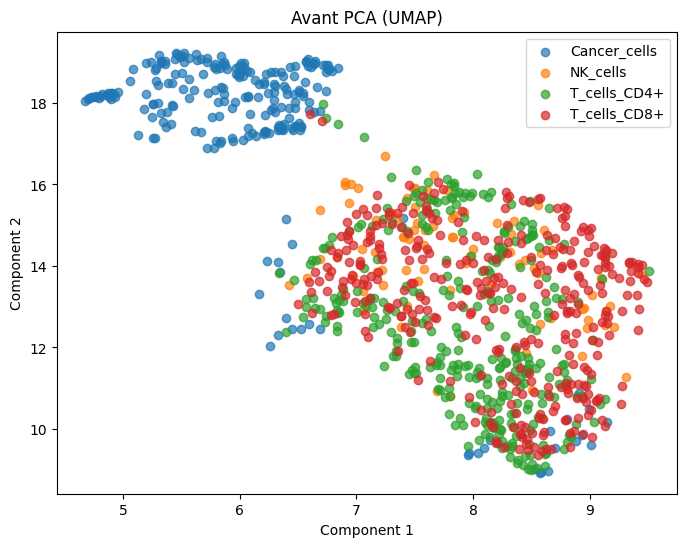

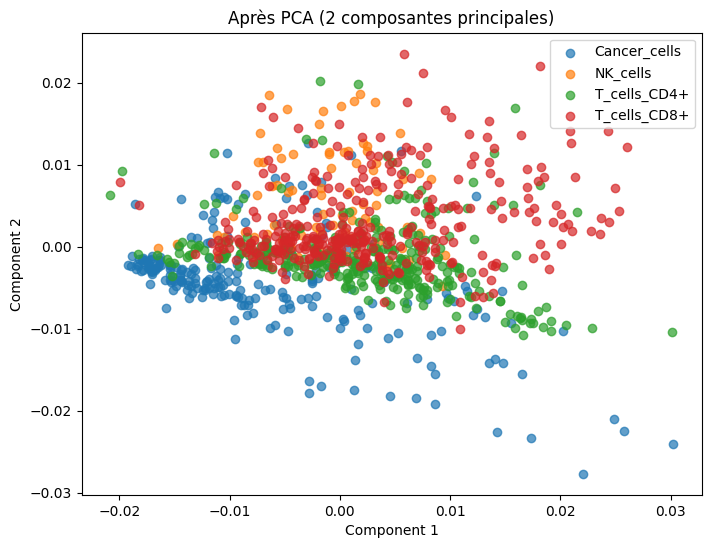

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# =========================
# Préprocessing standard RNA-seq
# =========================
def preprocess_X(X_sparse):
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X
    X = np.log1p(X)
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
    return X

# =========================
# Fonction pour visualiser en 2D
# =========================
def plot_2d_representation(X, y, title="2D Representation"):
    plt.figure(figsize=(8,6))
    for label in np.unique(y):
        plt.scatter(
            X[y==label, 0],
            X[y==label, 1],
            label=label,
            alpha=0.7
        )
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.legend()
    plt.show()

# =========================
# Exemple d'utilisation
# =========================
# X_train = données d'entraînement (sparse matrix)
# y_train = labels

# Préprocessing
X_processed = preprocess_X(X_train)

# -- Avant PCA (optionnel : UMAP pour 2D)
import umap
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(X_processed)
plot_2d_representation(X_umap, y_train, title="Avant PCA (UMAP)")

# -- Après PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed)
plot_2d_representation(X_pca, y_train, title="Après PCA (2 composantes principales)")


# Regression logistique

**Hétérogénéité des classes** : les effectifs diffèrent fortement entre les classes, ce qui peut entraîner une sous-représentation de certaines d’entre elles et biaiser les modèles de classification. Il est donc nécessaire de mettre en place des stratégies adaptées pour prendre en compte ce déséquilibre.

**Distribution des valeurs d’expression génique**: les données présentent une grande étendue de valeurs, une forte dispersion ainsi qu’un nombre important de zéros, caractéristiques des données RNA-seq et scRNA-seq. Ces propriétés imposent l’utilisation de méthodes de normalisation et de transformation appropriées afin de réduire le bruit et stabiliser la variance.

**Similarité entre certaines classes** : trois classes présentent des profils d’expression très proches, rendant leur séparation particulièrement difficile. Cette proximité biologique limite l’efficacité des frontières de décision simples et nécessite des approches de sélection de gènes et de modélisation adaptées.

**Nombre de gènes** : Un grand nombre de gènes ont une faible expression. Le jeu de données est de haute dimension, ce qui rend l'analyse plus complexe.

Les données d’expression génique ont été prétraitées selon un pipeline standard en RNA-seq. Une transformation logarithmique log1p a d’abord été appliquée afin de stabiliser la variance et de réduire l’impact des valeurs extrêmes. Les données ont ensuite été normalisées par cellule en divisant chaque gène par la somme totale des counts de la cellule, permettant ainsi de corriger les variations techniques liées à la profondeur de séquençage. Enfin, une standardisation des variables a été réalisée afin de garantir une optimisation stable des modèles de classification.

**Sélection de gènes avec SelectKBest** :
Pour réduire la dimensionnalité de notre jeu de données tout en conservant les informations les plus pertinentes pour la classification, nous avons utilisé la méthode SelectKBest. Cette méthode sélectionne les K meilleures caractéristiques (dans ce cas, les gènes) en fonction de leur capacité à discriminer les classes cibles.
score_func=f_classif : Le critère de sélection choisi est f_classif, qui calcule la statistique F pour chaque gène afin de mesurer la relation entre chaque gène et la variable cible. Ce test est souvent utilisé pour les données de type "ANOVA" et permet de déterminer l'importance de chaque gène pour la prédiction de la classe. En d'autres termes, il évalue la variance des gènes entre les différentes classes.
k=2000 : Cela signifie que nous avons choisi de conserver les 2000 gènes les plus importants, ceux qui présentent les meilleures statistiques F et qui, selon ce critère, sont les plus discriminants pour la tâche de classification. Ce nombre peut être ajusté en fonction de la taille du jeu de données et de la complexité de la tâche. Un nombre plus faible peut être utilisé si nous voulons éviter la surcharge computationnelle, tandis qu'un nombre plus élevé peut aider à capturer plus d'informations, mais risque aussi d'introduire plus de bruit.
L'objectif de cette méthode est de simplifier le modèle tout en maximisant la performance en éliminant les gènes qui apportent peu ou pas d'information pour distinguer les classes.

J'ai opté pour une régression logistique pour cette tâche de classification car elle est bien adaptée aux problèmes de classification binaire avec un grand nombre de caractéristiques (comme c’est le cas avec les données de RNA-seq). De plus, l'analyse exploratoire via l'ACP a montré que les classes étaient linéairement séparables dans l'espace réduit des composantes principales, ce qui est une condition idéale pour l'utilisation de la régression logistique. En outre, l'utilisation de la régularisation L1 permet de réduire le risque de sur-apprentissage et d'effectuer une sélection de caractéristiques, ce qui est crucial compte tenu de la grande dimension du jeu de données (>13 000 gènes). Enfin, le paramètre class_weight="balanced" nous permet de compenser les déséquilibres de classes, qui sont fréquents dans les études biologiques où certaines classes sont sous-représentées. Cette approche permet de tirer parti de la simplicité, de l'interprétabilité et de l'efficacité de la régression logistique tout en répondant aux spécificités du jeu de données.

Afin de gérer le déséquilibre entre les classes, nous avons utilisé le paramètre
class_weight="balanced" dans la régression logistique.
Cette approche ne crée pas de nouvelles données, mais modifie la fonction de coût afin de pénaliser davantage les erreurs commises sur les classes minoritaires.
Ainsi, chaque classe contribue de manière équitable à l’apprentissage du modèle, malgré des effectifs inégaux.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def preprocess_X(X_sparse):
    """
    Prétraitement RNA-seq :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray() if hasattr(X_sparse, "toarray") else X_sparse
    X = np.log1p(X)
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
    return X

class Classifier:
    def __init__(self, k_genes=2000, n_components=50):
        self.k_genes = k_genes
        self.n_components = n_components

        # Étape 1 : SVM Cancer_cells vs autres
        self.svm_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=self.k_genes)),
            ("pca", PCA(n_components=self.n_components)),
            ("svm", SVC(kernel="rbf", class_weight="balanced", probability=True))
        ])

        # Étape 2 : Gradient Boosting pour les 3 autres classes
        self.gb_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("select", SelectKBest(score_func=f_classif, k=self.k_genes)),
            ("pca", PCA(n_components=self.n_components)),
            ("gb", GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5))
        ])

    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        y = np.array(y)

        # Masque Cancer_cells vs autres
        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        if mask_cancer.sum() == 0 or mask_other.sum() == 0:
            raise ValueError("Le jeu de données doit contenir au moins une cellule Cancer_cells et une non-Cancer_cells")

        # Fit SVM pour Cancer_cells
        self.svm_pipeline.fit(X, mask_cancer)

        # Oversampling manuel pour les autres classes
        X_non_cancer = pd.DataFrame(X[mask_other])
        y_non_cancer = pd.Series(y[mask_other])
        class_counts = y_non_cancer.value_counts()
        max_size = class_counts.max()
        X_bal, y_bal = [], []

        for label in class_counts.index:
            X_c = X_non_cancer[y_non_cancer == label]
            y_c = y_non_cancer[y_non_cancer == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)

        # Fit Gradient Boosting sur les autres classes
        self.gb_pipeline.fit(X_bal, y_bal)

        return self

    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        pred_cancer = self.svm_pipeline.predict(X)
        final_pred = []

        for i, is_cancer in enumerate(pred_cancer):
            if is_cancer:
                final_pred.append("Cancer_cells")
            else:
                final_pred.append(self.gb_pipeline.predict(X[i].reshape(1, -1))[0])
        return np.array(final_pred)

    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        prob_cancer = self.svm_pipeline.predict_proba(X)[:, 1]
        prob_non_cancer = self.gb_pipeline.predict_proba(X)
        
        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0]*(prob_non_cancer.shape[1]))
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))
        return np.array(final_prob)



clf = Classifier(k_genes=2000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_proba = clf.predict_proba(X_test)



from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

y_true = y_test  # si tu as les labels de test

print("Balanced Accuracy :", balanced_accuracy_score(y_true, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_true, y_pred))
print("Classification Report :\n", classification_report(y_true, y_pred))



/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   32    43    76    81    91    97   103   121   149   165   193   214
   216   223   236   239   240   247   249   257   259   277   278   286
   341   356   450   467   469   487   491   508   519   542   555   566
   568   611   621   622   656   657   660   679   695   707   709   710
   713   727   732   775   809   818   820   833   841   851   856   930
   959   971  1008  1016  1022  1029  1036  1042  1047  1049  1075  1085
  1099  1108  1112  1125  1139  1142  1158  1161  1181  1194  1196  1197
  1208  1209  1212  1370  1405  1411  1424  1431  1441  1442  1466  1470
  1476  1480  1514  1549  1560  1580  1581  1587  1589  1590  1591  1600
  1606  1621  1630  1633  1635  1646  1659  1664  1665  1670  1686  1726
  1746  1754  1801  1814  1854  1862  1997  1998  2001  2002  2036  2047
  205

Balanced Accuracy : 0.7758770242186731
Confusion Matrix :
 [[115   0   3   0]
 [  0  21   4  18]
 [  0   1 142  25]
 [  0   1  34 136]]
Classification Report :
               precision    recall  f1-score   support

Cancer_cells       1.00      0.97      0.99       118
    NK_cells       0.91      0.49      0.64        43
T_cells_CD4+       0.78      0.85      0.81       168
T_cells_CD8+       0.76      0.80      0.78       171

    accuracy                           0.83       500
   macro avg       0.86      0.78      0.80       500
weighted avg       0.84      0.83      0.83       500



In [ ]:
# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: divide by zero encountered in divide
  msb = ssbn / float(dfbn)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


ValueError: The number of classes has to be greater than one; got 1 class

# ReadMe 

**Méthode utilisée** :

Log-normalisation : pour réduire l’étendue des données et stabiliser les variations entre variables.
Augmentation des données : pour équilibrer les classes et limiter le biais lié aux déséquilibres.
Analyse en Composantes Principales (ACP) : pour réduire la dimensionnalité et extraire les composantes les plus informatives.
Random Forest en deux étapes :
Classification globale : distinction entre Group1 et Group2.
Classification intra-groupe : identification des classes à l’intérieur de chaque groupe.

**Résultat** :
Après validation croisée, la balanced accuracy obtenue est de 0,76.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
 
# ---------------- Preprocessor ----------------
class Preprocessor:
    def __init__(self, variance_threshold=0.80):
        self.variance_threshold = variance_threshold
        self.pca = None
 
    def fit(self, X, y):
        # Transformation logarithmique
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        X_df = pd.DataFrame(X)
        y_df = pd.Series(y)
 
        # Équilibrage des classes (oversampling)
        class_counts = y_df.value_counts()
        max_size = class_counts.max()
        X_bal, y_bal = [], []
 
        for label in class_counts.index:
            X_c = X_df[y_df == label]
            y_c = y_df[y_df == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)
 
        # Concaténer et mélanger
        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)
 
        # PCA
        pca_tmp = PCA()
        pca_tmp.fit(X_bal)
        cum_var = np.cumsum(pca_tmp.explained_variance_ratio_)
        n_components = np.argmax(cum_var >= self.variance_threshold) + 1
 
        self.pca = PCA(n_components=n_components)
        self.pca.fit(X_bal)
 
        self.X_train_ = self.pca.transform(X_bal)
        self.y_train_ = y_bal.values
        return self
 
    def transform(self, X):
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        return self.pca.transform(X)
 
# ---------------- Classifier ----------------
class Classifier:
    def __init__(self):
        self.preprocessor = Preprocessor()
        self.model = RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
        )
 
    def fit(self, X, y):
        self.preprocessor.fit(X, y)
        self.model.fit(self.preprocessor.X_train_, self.preprocessor.y_train_)
 
    def predict(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict(X_proc)
 
    def predict_proba(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict_proba(X_proc)
 
# ---------------- Hierarchical Classifier ----------------
class HierarchicalClassifier:
    def __init__(self):
        self.clf_step1 = Classifier()          # Step1: Group1 vs Group2
        self.clf_step2_group1 = Classifier()   # Step2: Cancer vs NK
        self.clf_step2_group2 = Classifier()   # Step2: CD4+ vs CD8+
 
    def fit(self, X, y):
        # Step 1: Group1 (Cancer_cells, NK_cells) vs Group2 (T_cells_CD4+, T_cells_CD8+)
        y_step1 = np.array([0 if label in ['Cancer_cells','NK_cells'] else 1 for label in y])
        self.clf_step1.fit(X, y_step1)
 
        # Step 2: classifier pour chaque groupe
        mask_group1 = [label in ['Cancer_cells','NK_cells'] for label in y]
        self.clf_step2_group1.fit(
            X[mask_group1],
            np.array([0 if label=='Cancer_cells' else 1 for label in y[mask_group1]])
        )
 
        mask_group2 = [label in ['T_cells_CD4+','T_cells_CD8+'] for label in y]
        self.clf_step2_group2.fit(
            X[mask_group2],
            np.array([0 if label=='T_cells_CD4+' else 1 for label in y[mask_group2]])
        )
 
    def predict(self, X):
        step1_pred = self.clf_step1.predict(X)
        final_pred = np.array([""]*len(step1_pred), dtype=object)
 
        # Group1 : Cancer vs NK
        idx_group1 = np.where(step1_pred==0)[0]
        if len(idx_group1)>0:
            pred_group1 = self.clf_step2_group1.predict(X[idx_group1])
            final_pred[idx_group1] = ["Cancer_cells" if p==0 else "NK_cells" for p in pred_group1]
 
        # Group2 : CD4+ vs CD8+
        idx_group2 = np.where(step1_pred==1)[0]
        if len(idx_group2)>0:
            pred_group2 = self.clf_step2_group2.predict(X[idx_group2])
            final_pred[idx_group2] = ["T_cells_CD4+" if p==0 else "T_cells_CD8+" for p in pred_group2]
 
        return final_pred
 

In [ ]:

from sklearn.model_selection import StratifiedKFold

# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====
Balanced accuracy (fold 1): 0.7226

===== Fold 2/5 =====
Balanced accuracy (fold 2): 0.7810

===== Fold 3/5 =====
Balanced accuracy (fold 3): 0.7976

===== Fold 4/5 =====
Balanced accuracy (fold 4): 0.7885

===== Fold 5/5 =====
Balanced accuracy (fold 5): 0.7421

GLOBAL RESULTS (ALL FOLDS)
Mean Balanced Accuracy: 0.7663618541739254
Std Balanced Accuracy: 0.028920145154702943

Classification Report (global):
              precision    recall  f1-score   support

Cancer_cells       0.96      0.99      0.97       237
    NK_cells       0.91      0.35      0.51        85
T_cells_CD4+       0.88      0.84      0.86       336
T_cells_CD8+       0.76      0.89      0.82       342

    accuracy                           0.85      1000
   macro avg       0.87      0.77      0.79      1000
weighted avg       0.86      0.85      0.84      1000

Confusion Matrix (global):
[[234   0   0   3]
 [  3  30   4  48]
 [  6   1 282  47]
 [  2   2  35 303]]


**Méthode utilisée**

Log-normalisation : pour réduire l’étendue des données et stabiliser les variations entre variables.
Normalisation de la taille (size normalization) : pour rendre les variables comparables entre elles.
Correction du déséquilibre des classes : via les paramètres de la régression logistique.
Sélection de variables : avec SelectKBest afin de réduire la dimensionnalité et ne conserver que les variables les plus informatives.
Régression logistique : entraînée avec Grid Search pour optimiser les hyperparamètres, sans amélioration notable par rapport aux paramètres par défaut et regression en deux temps 

**Résultat** :
Après validation croisée, la balanced accuracy obtenue est de 0,86.
Inconvénient : temps d’entraînement long

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 

In [ ]:

from sklearn.model_selection import StratifiedKFold

# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====
Balanced accuracy (fold 1): 0.4800

===== Fold 2/5 =====
Balanced accuracy (fold 2): 0.5000

===== Fold 3/5 =====
Balanced accuracy (fold 3): 0.4947

===== Fold 4/5 =====
Balanced accuracy (fold 4): 0.4948

===== Fold 5/5 =====
Balanced accuracy (fold 5): 0.5000

GLOBAL RESULTS (ALL FOLDS)
Mean Balanced Accuracy: 0.493889497288277
Std Balanced Accuracy: 0.007344804186583758

Classification Report (global):
              precision    recall  f1-score   support

Cancer_cells       0.82      0.99      0.89       237
    NK_cells       0.12      0.99      0.21        85
T_cells_CD4+       0.00      0.00      0.00       336
T_cells_CD8+       0.00      0.00      0.00       342

    accuracy                           0.32      1000
   macro avg       0.23      0.49      0.28      1000
weighted avg       0.20      0.32      0.23      1000

Confusion Matrix (global):
[[234   3   0   0]
 [  1  84   0   0]
 [ 46 290   0   0]
 [  5 337   0   0]]


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

**Méthode utilisée**

Log-normalisation : pour réduire l’étendue des données et stabiliser les variations entre variables.
Normalisation de la taille (size normalization) : pour rendre les variables comparables entre elles.
Correction du déséquilibre des classes : via les paramètres de la régression logistique.
Sélection de variables : avec SelectKBest afin de réduire la dimensionnalité et ne conserver que les variables les plus informatives.
Random forest 

**Résultat** :
Après validation croisée, la balanced accuracy obtenue est de 0,73 (mais plus de 0 dans la matrice de corrélation).

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-4)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
         #   ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=5500  #  à ajuster (1000–5000)
            )),
            ("clf",  RandomForestClassifier(
                 n_estimators=2500,        # nombre d'arbres
                 max_depth=None,           # profondeur illimitée
                 class_weight="balanced",  # équilibre les classes
                n_jobs=-1,                # parallélisation CPU
                random_state=42
        ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)

In [ ]:

from sklearn.model_selection import StratifiedKFold

# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  249   508   818  1125  1450  1580  1621  1686  2300  2402  2441  3156
  3405  3871  4050  4353  4471  4839  5547  6088  7882  7984  8088  8414
  8763  8822  9659  9693  9720 10241 10391 10541 10823 11225 11359 11417
 11430 11774 11860 12231 12270 12497 13008 13204 13247] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 1): 0.7243

===== Fold 2/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  286   515   710   845  1466  1558  1594  2607  2820  2845  3769  3865
  4112  4156  4338  4659  4906  5433  5825  5885  6006  7825  8357  9606
  9630 10125 10139 10918 11371 11608 12177 12764 12768 12819 13099] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 2): 0.7424

===== Fold 3/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   33   220   223   611  1016  1442  1606  2431  2433  2511  2594  3024
  3092  3176  3354  4166  4230  4714  5802  6775  7750  7913  8151  8712
  9592  9639  9730  9969 10047 10150 10583 10593 10840 11414 11745 13468] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 3): 0.7536

===== Fold 4/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  216   247   621   856  1370  1814  1830  2569  2827  2836  2853  3743
  4066  4361  4668  4671  4788  5286  6194  6717  7133  7476  7756  7969
  9557  9584  9610  9905 10038 10087 10370 11365 12225 12677 12684 12762
 12963 13249 13418] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 4): 0.7149

===== Fold 5/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   76  1576  1659  1664  1907  2001  2650  3101  3390  3856  4055  4510
  4513  4996  5174  5392  5607  5895  6053  6055  6098  6156  7975  8034
  8427  9201  9451  9575  9675  9687  9692 11052 11376 11602 11727 11881
 12237 12822 12872 13443] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 5): 0.7310

GLOBAL RESULTS (ALL FOLDS)
Mean Balanced Accuracy: 0.7332402485653573
Std Balanced Accuracy: 0.013577831267500168

Classification Report (global):
              precision    recall  f1-score   support

Cancer_cells       0.98      1.00      0.99       237
    NK_cells       1.00      0.15      0.27        85
T_cells_CD4+       0.92      0.86      0.89       336
T_cells_CD8+       0.73      0.93      0.82       342

    accuracy                           0.85      1000
   macro avg       0.91      0.73      0.74      1000
weighted avg       0.88      0.85      0.83      1000

Confusion Matrix (global):
[[236   0   0   1]
 [  0  13   3  69]
 [  2   0 288  46]
 [  2   0  23 317]]


**Méthode utilisée**

Log-normalisation : pour réduire l’étendue des données et stabiliser les variations entre variables.
augmentation de données : 
Sélection de variables : avec SelectKBest afin de réduire la dimensionnalité et ne conserver que les variables les plus informatives.
svm avec GridSearchCV

**Résultat** :
Après validation croisée, la balanced accuracy obtenue est de 0,79. avec une pression au dessus de 0,8 pour chaque classe et pour cancer cells et nk audessus de 0,9. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# ---------------- Preprocessor ----------------
class Preprocessor:
    def __init__(self, variance_threshold=0.80):
        self.variance_threshold = variance_threshold
        self.pca = None

    def fit(self, X, y):
        # Transformation logarithmique
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        X_df = pd.DataFrame(X)
        y_df = pd.Series(y)

        # Équilibrage des classes (oversampling)
        class_counts = y_df.value_counts()
        max_size = class_counts.max()
        X_bal, y_bal = [], []

        for label in class_counts.index:
            X_c = X_df[y_df == label]
            y_c = y_df[y_df == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        # Concaténer et mélanger
        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)

        # PCA
        pca_tmp = PCA()
        pca_tmp.fit(X_bal)
        cum_var = np.cumsum(pca_tmp.explained_variance_ratio_)
        n_components = np.argmax(cum_var >= self.variance_threshold) + 1

        self.pca = PCA(n_components=n_components)
        self.pca.fit(X_bal)

        self.X_train_ = self.pca.transform(X_bal)
        self.y_train_ = y_bal.values
        return self

    def transform(self, X):
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        return self.pca.transform(X)


# ---------------- Classifier ----------------
class HClassifier:
    def __init__(self):
        self.preprocessor = Preprocessor()
        self.model = SVC(random_state=42)

    def fit(self, X, y):
        # Appliquer le préprocesseur (PCA, normalisation, imputation)
        self.preprocessor.fit(X, y)

        # Paramètres pour GridSearchCV
        param_grid = {
            'C': [0.1, 1, 10],  # Paramètre de régularisation
            'kernel': ['linear', 'rbf'],  # Type de noyau
            'gamma': ['scale', 'auto'],  # Paramètre du noyau RBF
            'degree': [3, 4, 5]  # Degré du noyau polynomial (si applicable)
        }

        # GridSearchCV pour trouver les meilleurs hyperparamètres
        grid_search = GridSearchCV(self.model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
        grid_search.fit(self.preprocessor.X_train_, self.preprocessor.y_train_)

        # Récupérer le meilleur modèle
        self.model = grid_search.best_estimator_
        print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

    def predict(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict(X_proc)

    def predict_proba(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict_proba(X_proc)

# ---------------- Hierarchical Classifier ----------------
class Classifier:
    def __init__(self):
        # Étape 1 : séparer les groupes
        self.clf_step1 = HClassifier()
        # Étape 2 : classifier à l'intérieur des groupes
        self.clf_step2_group1 = HClassifier()  # Cancer vs NK
        self.clf_step2_group2 = HClassifier()  # CD4+ vs CD8+

    def fit(self, X, y):
        y_step1 = np.array([0 if label in ['Cancer_cells','NK_cells'] else 1 for label in y])
        self.clf_step1.fit(X, y_step1)

        # Sous-groupe 1 : Cancer vs NK
        mask_group1 = np.array([label in ['Cancer_cells','NK_cells'] for label in y])
        self.clf_step2_group1.fit(
            X[mask_group1],
            np.array([0 if label=='Cancer_cells' else 1 for label in y[mask_group1]])
        )

        # Sous-groupe 2 : CD4+ vs CD8+
        mask_group2 = np.array([label in ['T_cells_CD4+','T_cells_CD8+'] for label in y])
        self.clf_step2_group2.fit(
            X[mask_group2],
            np.array([0 if label=='T_cells_CD4+' else 1 for label in y[mask_group2]])
        )

    def predict(self, X):
        step1_pred = self.clf_step1.predict(X)
        final_pred = np.array([""]*len(step1_pred), dtype=object)

        # Sous-groupe 1
        idx_group1 = np.where(step1_pred==0)[0]
        if len(idx_group1) > 0:
            pred_group1 = self.clf_step2_group1.predict(X[idx_group1])
            final_pred[idx_group1] = ["Cancer_cells" if p==0 else "NK_cells" for p in pred_group1]

        # Sous-groupe 2
        idx_group2 = np.where(step1_pred==1)[0]
        if len(idx_group2) > 0:
            pred_group2 = self.clf_step2_group2.predict(X[idx_group2])
            final_pred[idx_group2] = ["T_cells_CD4+" if p==0 else "T_cells_CD8+" for p in pred_group2]

        return final_pred



# ---------------- Exemple d'utilisation ----------------
# Supposons que tu as déjà tes données : X_train, y_train, X_test, y_test
hier_clf = Classifier()
hier_clf.fit(X_train, y_train)

# Prédiction
y_pred = hier_clf.predict(X_test)

# Évaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

bal_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", bal_acc)

cm = confusion_matrix(
    y_test, y_pred,
    labels=['Cancer_cells', 'NK_cells', 'T_cells_CD4+', 'T_cells_CD8+']
)
print("Confusion Matrix:\n", cm)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from GridSearchCV: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from GridSearchCV: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from GridSearchCV: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

Cancer_cells       1.00      0.94      0.97       118
    NK_cells       0.91      0.47      0.62        43
T_cells_CD4+       0.83      0.87      0.85       168
T_cells_CD8+       0.80      0.89      0.84       171

    accuracy                           0.86       500
   macro avg       0.88      0.79      0.82       500
weighted avg       0.87      0.86      0.85       500

Balanced Accuracy: 0.7909326882769926
Confusion Matrix:
 [[111   0   7   0]
 

**Méthode utilisée**

Log-normalisation : pour réduire l’étendue des données et stabiliser les variations entre variables.
augmentation de données : duplication de ligne 
Sélection de variables : reduction de dimension via acp 
Stacking SVM et random forest 

**Résultat** :
Après validation croisée, la balanced accuracy obtenue est de 0,79. avec une pression au dessus de 0,8 pour chaque classe et pour cancer cells et nk audessus de 0,9. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ---------------- Preprocessor ----------------
class Preprocessor:
    def __init__(self, variance_threshold=0.80):
        self.variance_threshold = variance_threshold
        self.pca = None

    def fit(self, X, y):
        # Transformation logarithmique
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        X_df = pd.DataFrame(X)
        y_df = pd.Series(y)

        # Équilibrage des classes (oversampling)
        class_counts = y_df.value_counts()
        max_size = class_counts.max()
        X_bal, y_bal = [], []

        for label in class_counts.index:
            X_c = X_df[y_df == label]
            y_c = y_df[y_df == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_bal.append(pd.concat([X_c, X_dup]))
                y_bal.append(pd.concat([y_c, y_dup]))
            else:
                X_bal.append(X_c)
                y_bal.append(y_c)

        # Concaténer et mélanger
        X_bal = pd.concat(X_bal).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_bal).sample(frac=1, random_state=42)
        X_bal = np.array(X_bal)

        # PCA
        pca_tmp = PCA()
        pca_tmp.fit(X_bal)
        cum_var = np.cumsum(pca_tmp.explained_variance_ratio_)
        n_components = np.argmax(cum_var >= self.variance_threshold) + 1

        self.pca = PCA(n_components=n_components)
        self.pca.fit(X_bal)

        self.X_train_ = self.pca.transform(X_bal)
        self.y_train_ = y_bal.values
        return self

    def transform(self, X):
        X = np.log1p(X.toarray() if hasattr(X, "toarray") else X)
        return self.pca.transform(X)


# ---------------- Stacking Classifier ----------------
class Classifier:
    def __init__(self):
        self.preprocessor = Preprocessor()
        # Modèle Stacking avec plusieurs modèles de base
        self.model = StackingClassifier(
            estimators=[
                ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
                ('svm', SVC(kernel='linear', probability=True, random_state=42))
            ],
            final_estimator=LogisticRegression()
        )

    def fit(self, X, y):
        self.preprocessor.fit(X, y)
        self.model.fit(self.preprocessor.X_train_, self.preprocessor.y_train_)

    def predict(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict(X_proc)

    def predict_proba(self, X):
        X_proc = self.preprocessor.transform(X)
        return self.model.predict_proba(X_proc)


# ---------------- Classification en deux étapes ----------------
class HierarchicalClassifier:
    def __init__(self):
        self.clf_step1 = Classifier()  # Étape 1 : Groupe 1 vs Groupe 2
        self.clf_step2_group1 = Classifier()  # Étape 2 : Cancer vs NK
        self.clf_step2_group2 = Classifier()  # Étape 2 : CD4+ vs CD8+

    def fit(self, X, y):
        # Étape 1 : Séparer Groupe 1 (Cancer_cells, NK_cells) vs Groupe 2 (T_cells_CD4+, T_cells_CD8+)
        y_step1 = np.array([0 if label in ['Cancer_cells', 'NK_cells'] else 1 for label in y])
        self.clf_step1.fit(X, y_step1)

        # Étape 2 : Séparer pour Groupe 1 : Cancer_cells vs NK_cells
        mask_group1 = [label in ['Cancer_cells', 'NK_cells'] for label in y]
        self.clf_step2_group1.fit(
            X[mask_group1],
            np.array([0 if label == 'Cancer_cells' else 1 for label in y[mask_group1]])
        )

        # Étape 2 : Séparer pour Groupe 2 : T_cells_CD4+ vs T_cells_CD8+
        mask_group2 = [label in ['T_cells_CD4+', 'T_cells_CD8+'] for label in y]
        self.clf_step2_group2.fit(
            X[mask_group2],
            np.array([0 if label == 'T_cells_CD4+' else 1 for label in y[mask_group2]])
        )

    def predict(self, X):
        # Étape 1 : Séparation entre les deux groupes
        step1_pred = self.clf_step1.predict(X)
        final_pred = np.array([""] * len(step1_pred), dtype=object)

        # Groupe 1 : Cancer_cells vs NK_cells
        idx_group1 = np.where(step1_pred == 0)[0]
        if len(idx_group1) > 0:
            pred_group1 = self.clf_step2_group1.predict(X[idx_group1])
            final_pred[idx_group1] = ["Cancer_cells" if p == 0 else "NK_cells" for p in pred_group1]

        # Groupe 2 : T_cells_CD4+ vs T_cells_CD8+
        idx_group2 = np.where(step1_pred == 1)[0]
        if len(idx_group2) > 0:
            pred_group2 = self.clf_step2_group2.predict(X[idx_group2])
            final_pred[idx_group2] = ["T_cells_CD4+" if p == 0 else "T_cells_CD8+" for p in pred_group2]

        return final_pred


# ---------------- Exemple d'utilisation ----------------
# Supposons que tu as déjà tes données
# X_train, y_train, X_test, y_test

# Initialisation du classifieur avec les étapes
hier_clf = HierarchicalClassifier()

# Entraînement du modèle
hier_clf.fit(X_train, y_train)

# Prédiction
y_pred = hier_clf.predict(X_test)

# Évaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calcul de l'accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Calcul de la balanced accuracy
bal_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", bal_acc)

# Matrice de confusion
cm = confusion_matrix(
    y_test, y_pred,
    labels=['Cancer_cells', 'NK_cells', 'T_cells_CD4+', 'T_cells_CD8+']
)
print("Confusion Matrix:\n", cm)


Classification Report:
              precision    recall  f1-score   support

Cancer_cells       1.00      0.98      0.99       118
    NK_cells       0.95      0.49      0.65        43
T_cells_CD4+       0.83      0.89      0.86       168
T_cells_CD8+       0.80      0.85      0.82       171

    accuracy                           0.86       500
   macro avg       0.90      0.80      0.83       500
weighted avg       0.87      0.86      0.86       500

Accuracy: 0.864
Balanced Accuracy: 0.8030583249280737
Confusion Matrix:
 [[116   0   1   1]
 [  0  21   5  17]
 [  0   0 150  18]
 [  0   1  25 145]]


# New test

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import scanpy as sc

# -----------------------------
# Préprocesseur RNA-seq
# -----------------------------
class Preprocessor:
    def __init__(self, n_top_genes=2000, variance_threshold=0.8):
        self.n_top_genes = n_top_genes
        self.variance_threshold = variance_threshold
        self.pca = None
        self.var_genes_idx = None  # <- mémorise les gènes

    def fit(self, X, y=None):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes=self.n_top_genes)

        # mémoriser les indices
        self.var_genes_idx = np.where(adata.var['highly_variable'])[0]

        X_sel = adata[:, self.var_genes_idx].X

        pca_tmp = PCA()
        pca_tmp.fit(X_sel)
        cum_var = np.cumsum(pca_tmp.explained_variance_ratio_)
        n_components = np.argmax(cum_var >= self.variance_threshold) + 1

        self.pca = PCA(n_components=n_components)
        self.pca.fit(X_sel)
        return self

    def transform(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        # filtrer les mêmes gènes que pour le fit
        X_sel = adata[:, self.var_genes_idx].X
        return self.pca.transform(X_sel)


# -----------------------------
# Classifieur hiérarchique
# -----------------------------
class Classifier:
    def __init__(self, n_top_genes=2000, variance_threshold=0.8):
        # Préprocesseur intégré
        self.preprocessor = Preprocessor(
            n_top_genes=n_top_genes,
            variance_threshold=variance_threshold
        )

        # Étape 1 : Cancer_cells vs autres
        self.cancer_detector = LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            solver="lbfgs"
        )

        # Étape 2 : classification des autres classes
        self.non_cancer_classifier = GradientBoostingClassifier(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=5
        )

    def fit(self, X_sparse, y):
        # Prétraitement
        X = self.preprocessor.fit(X_sparse, y).transform(X_sparse)
        y = np.array(y)

        # Masques Cancer / Non-cancer
        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        if mask_cancer.sum() == 0 or mask_other.sum() == 0:
            raise ValueError(
                "Le jeu de données doit contenir au moins une cellule "
                "Cancer_cells et une non-Cancer_cells"
            )

        # ---- Étape 1 : binaire
        self.cancer_detector.fit(X, mask_cancer)

        # ---- Étape 2 : oversampling pour classes non-cancéreuses
        X_non_cancer = pd.DataFrame(X[mask_other])
        y_non_cancer = pd.Series(y[mask_other])

        class_counts = y_non_cancer.value_counts()
        max_size = class_counts.max()

        X_balanced, y_balanced = [], []

        for label in class_counts.index:
            X_c = X_non_cancer[y_non_cancer == label]
            y_c = y_non_cancer[y_non_cancer == label]
            n_dup = max_size - len(X_c)
            if n_dup > 0:
                X_dup = X_c.sample(n=n_dup, replace=True, random_state=42)
                y_dup = y_c.sample(n=n_dup, replace=True, random_state=42)
                X_balanced.append(pd.concat([X_c, X_dup]))
                y_balanced.append(pd.concat([y_c, y_dup]))
            else:
                X_balanced.append(X_c)
                y_balanced.append(y_c)

        X_bal = pd.concat(X_balanced).sample(frac=1, random_state=42)
        y_bal = pd.concat(y_balanced).sample(frac=1, random_state=42)

        # Convertir en numpy pour scikit-learn
        X_bal = np.array(X_bal)
        y_bal = np.array(y_bal)

        # ---- Étape 2 : multiclasse
        self.non_cancer_classifier.fit(X_bal, y_bal)

        return self

    def predict(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)

        is_cancer = self.cancer_detector.predict(X)
        final_pred = []

        for i, cancer in enumerate(is_cancer):
            if cancer:
                final_pred.append("Cancer_cells")
            else:
                pred = self.non_cancer_classifier.predict(
                    X[i].reshape(1, -1)
                )[0]
                final_pred.append(pred)

        return np.array(final_pred)

    def predict_proba(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)

        prob_cancer = self.cancer_detector.predict_proba(X)[:, 1]
        prob_non_cancer = self.non_cancer_classifier.predict_proba(X)

        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0] * prob_non_cancer.shape[1])
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))

        return np.array(final_prob)


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


class RNAseqPreprocessor:
    def __init__(self, n_top_genes=5000):
        """
        Préprocesseur RNA-seq :
        - Normalisation library size
        - Log1p
        - Sélection des gènes les plus variables
        """
        self.n_top_genes = n_top_genes
        self.var_genes_idx = None

    def fit(self, X, y=None):
        # Sparse -> dense
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        # 1️⃣ Normalisation par cellule + log1p
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        # 2️⃣ Gènes les plus variables
        sc.pp.highly_variable_genes(adata, n_top_genes=self.n_top_genes)
        self.var_genes_idx = np.where(adata.var['highly_variable'])[0]

        # 3️⃣ Transformation finale
        self.X_train_ = adata[:, self.var_genes_idx].X
        self.y_train_ = y
        return self

    def transform(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        # Normalisation + log1p
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        # Gènes variables
        X_sel = adata[:, self.var_genes_idx].X
        return X_sel


class Classifier:
    def __init__(self, n_top_genes=5000):
        # Préprocesseur RNA-seq
        self.preprocessor = RNAseqPreprocessor(n_top_genes=n_top_genes)

        # Étape 1 : Cancer_cells vs autres
        self.cancer_detector = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                class_weight="balanced",
                max_iter=2000,
                solver="lbfgs",
                multi_class="auto"
            ))
        ])

        # Étape 2 : classification des autres cellules
        self.non_cancer_classifier = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
               # class_weight="balanced",
                max_iter=5000,
                solver="saga",    
                penalty="elasticnet", 
                l1_ratio=0.4,  
                multi_class="multinomial",
                C=0.01  
            ))
        ])

    def fit(self, X_sparse, y):
        # Prétraitement RNA-seq
        X = self.preprocessor.fit(X_sparse, y).transform(X_sparse)
        y = np.array(y)

        # Masques Cancer / Non-cancer
        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        # Étape 1 : détecteur binaire
        self.cancer_detector.fit(X, mask_cancer)

        # Étape 2 : oversampling pour équilibrer les classes non-cancéreuses
        X_non_cancer = pd.DataFrame(X[mask_other])
        y_non_cancer = pd.Series(y[mask_other])
        class_counts = y_non_cancer.value_counts()
        max_size = class_counts.max()

        X_bal, y_bal = [], []
        for label in class_counts.index:
            Xc = X_non_cancer[y_non_cancer == label]
            yc = y_non_cancer[y_non_cancer == label]
            n_dup = max_size - len(Xc)
            if n_dup > 0:
                n_cells = len(Xc)
                n_repeat = n_dup // n_cells
                remainder = n_dup % n_cells

                # Dupliquer chaque cellule n_repeat fois
                X_dup = pd.concat([Xc] * n_repeat, ignore_index=True)
                y_dup = pd.concat([yc] * n_repeat, ignore_index=True)

                # Pour le reste, tirer des cellules aléatoirement
                if remainder > 0:
                    extra_X = Xc.sample(n=remainder, replace=True, random_state=42)
                    extra_y = yc.sample(n=remainder, replace=True, random_state=42)
                    X_dup = pd.concat([X_dup, extra_X], ignore_index=True)
                    y_dup = pd.concat([y_dup, extra_y], ignore_index=True)

                    # Ajouter les originaux + duplications
                X_bal.append(pd.concat([Xc.reset_index(drop=True), X_dup]))
                y_bal.append(pd.concat([yc.reset_index(drop=True), y_dup]))
            else:
                X_bal.append(Xc)
                y_bal.append(yc)

        X_bal = np.array(pd.concat(X_bal).sample(frac=1, random_state=42))
        y_bal = np.array(pd.concat(y_bal).sample(frac=1, random_state=42))

        # Étape 2 : classifier les autres classes
        self.non_cancer_classifier.fit(X_bal, y_bal)
        return self

    def predict(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        is_cancer = self.cancer_detector.predict(X)

        final_pred = []
        for i, cancer in enumerate(is_cancer):
            if cancer:
                final_pred.append("Cancer_cells")
            else:
                final_pred.append(
                    self.non_cancer_classifier.predict(X[i].reshape(1, -1))[0]
                )
        return np.array(final_pred)

    def predict_proba(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        prob_cancer = self.cancer_detector.predict_proba(X)[:, 1]
        prob_non_cancer = self.non_cancer_classifier.predict_proba(X)

        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0] * prob_non_cancer.shape[1])
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))
        return np.array(final_prob)


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


class RNAseqPreprocessor:
    def __init__(self, n_top_genes=1000):
        """
        Préprocesseur RNA-seq :
        - Normalisation library size
        - Log1p
        - Sélection des gènes les plus variables
        """
        self.n_top_genes = n_top_genes
        self.var_genes_idx = None

    def fit(self, X, y=None):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        # Normalisation par cellule + log1p
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        # Gènes les plus variables
        sc.pp.highly_variable_genes(adata, n_top_genes=self.n_top_genes)
        self.var_genes_idx = np.where(adata.var['highly_variable'])[0]

        self.X_train_ = adata[:, self.var_genes_idx].X
        self.y_train_ = y
        return self

    def transform(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        X_sel = adata[:, self.var_genes_idx].X
        return X_sel


class Classifier:
    def __init__(self, n_top_genes=1000):
        self.preprocessor = RNAseqPreprocessor(n_top_genes=n_top_genes)

        # Étape 1 : Cancer_cells vs autres
        self.cancer_detector = Pipeline([
           # ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                class_weight="balanced",
                max_iter=1000,
                solver="lbfgs",
                multi_class="auto"
            ))
         ])
        

        # Étape 2 : classification des autres cellules
        self.non_cancer_classifier = Pipeline([
            ("pca", PCA(n_components=100, random_state=42)),
            ("clf", GradientBoostingClassifier(
                n_estimators=180,
                learning_rate=0.01,
                max_depth=9,   
                subsample=0.7,
                random_state=42
            ))
          #  ("scaler", StandardScaler()),

           # ("clf", LogisticRegression(
            #    max_iter=5000,
             #   solver="saga",    
              #  penalty="elasticnet", 
               # l1_ratio=0.4,  
                #multi_class="multinomial",
                #C=0.01  
            #))
        ])

    def fit(self, X_sparse, y):
        X = self.preprocessor.fit(X_sparse, y).transform(X_sparse)
        y = np.array(y)

        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        # Étape 1 : détecteur binaire
        self.cancer_detector.fit(X, mask_cancer)

        # Étape 2 : oversampling
        X_non_cancer = pd.DataFrame(X[mask_other])
        y_non_cancer = pd.Series(y[mask_other])
        class_counts = y_non_cancer.value_counts()
        max_size = class_counts.max()

        X_bal, y_bal = [], []
        for label in class_counts.index:
            Xc = X_non_cancer[y_non_cancer == label]
            yc = y_non_cancer[y_non_cancer == label]
            n_dup = max_size - len(Xc)

            X_dup = pd.DataFrame()
            y_dup = pd.Series(dtype=yc.dtype)

            if n_dup > 0:
                n_cells = len(Xc)
                n_repeat = n_dup // n_cells
                remainder = n_dup % n_cells

                if n_repeat > 0:
                    X_dup = pd.concat([Xc] * n_repeat, ignore_index=True)
                    y_dup = pd.concat([yc] * n_repeat, ignore_index=True)

                if remainder > 0:
                    extra_X = Xc.sample(n=remainder, replace=True, random_state=42)
                    extra_y = yc.sample(n=remainder, replace=True, random_state=42)
                    X_dup = pd.concat([X_dup, extra_X], ignore_index=True)
                    y_dup = pd.concat([y_dup, extra_y], ignore_index=True)

            X_bal.append(pd.concat([Xc.reset_index(drop=True), X_dup]))
            y_bal.append(pd.concat([yc.reset_index(drop=True), y_dup]))

        X_bal = np.array(pd.concat(X_bal).sample(frac=1, random_state=42))
        y_bal = np.array(pd.concat(y_bal).sample(frac=1, random_state=42))

        self.non_cancer_classifier.fit(X_bal, y_bal)
        return self

    def predict(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        is_cancer = self.cancer_detector.predict(X)

        final_pred = []
        for i, cancer in enumerate(is_cancer):
            if cancer:
                final_pred.append("Cancer_cells")
            else:
                final_pred.append(self.non_cancer_classifier.predict(X[i].reshape(1, -1))[0])
        return np.array(final_pred)

    def predict_proba(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        prob_cancer = self.cancer_detector.predict_proba(X)[:, 1]
        prob_non_cancer = self.non_cancer_classifier.predict_proba(X)

        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0] * prob_non_cancer.shape[1])
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))
        return np.array(final_prob)


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score

# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)
clf = Classifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

# X_raw = matrice count cells x genes de scMARK
adata = sc.AnnData(X_train)

# Normalisation + log1p
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Sélection des gènes variables (top 5000 par exemple)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
X = adata[:, adata.var['highly_variable']].X
y = labels  # vecteur des annotations de cellules


In [ ]:
import matplotlib.pyplot as plt

def check_log_linearity(X_train, y, gene_idx):
    # X : matrice cells x genes
    # y : classes binaires pour simplification (ex. Cancer vs autre)
    df = pd.DataFrame({
        'feature': X[:, gene_idx],
        'y': y
    })
    
    # Créer 10 bins
    df['bin'] = pd.qcut(df['feature'], q=10, duplicates='drop')
    grouped = df.groupby('bin')['y'].mean()  # proportion y=1
    odds = grouped / (1 - grouped)
    log_odds = np.log(odds)

    plt.plot(range(len(log_odds)), log_odds, marker='o')
    plt.xlabel(f'Bins de gène {gene_idx}')
    plt.ylabel('log-odds(y=1)')
    plt.title('Vérification log-linéarité')
    plt.show()


In [ ]:
class RNAseqPreprocessor:
    def __init__(self, n_top_genes=2000, normalization_method="log1p"):
        """
        Préprocesseur RNA-seq :
        - Normalisation : log1p ou scran
        - Sélection des gènes les plus variables
        """
        self.n_top_genes = n_top_genes
        self.var_genes_idx = None
        self.normalization_method = normalization_method

    def fit(self, X, y=None):
        # Sparse -> dense
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        # Normalisation
        if self.normalization_method == "log1p":
            sc.pp.normalize_total(adata, target_sum=1e4)
            sc.pp.log1p(adata)
        elif self.normalization_method == "scran":
            sc.pp.normalize_total(adata, target_sum=1e4)  # Exemples d'application de scran à ajouter
            # Hypothétique utilisation de scran, tu peux explorer le package `scran` en dehors de `scanpy` si nécessaire.

        # 2️⃣ Gènes les plus variables
        sc.pp.highly_variable_genes(adata, n_top_genes=self.n_top_genes)
        self.var_genes_idx = np.where(adata.var['highly_variable'])[0]

        # 3️⃣ Transformation finale
        self.X_train_ = adata[:, self.var_genes_idx].X
        self.y_train_ = y
        return self


In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Charger et préparer les données
# ---------------------------

# X_raw : matrice count cells x genes
# labels : vecteur d'annotations des cellules
# Exemple : X_raw.shape = (10000, 20000), labels.shape = (10000,)

adata = sc.AnnData(X_train)

# Normalisation par cellule et log1p
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Sélection des gènes les plus variables (top 5000)
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
X = adata[:, adata.var['highly_variable']].X
y = np.array(labels)

# ---------------------------
# 2️⃣ Fonction pour vérifier la log-linéarité
# ---------------------------

def check_log_linearity(X, y, feature_idx, n_bins=10, class_of_interest=None):
    """
    X : matrice cells x genes (numpy)
    y : labels des cellules
    feature_idx : index de la feature à tester
    n_bins : nombre de bins pour discretiser la feature
    class_of_interest : si multi-classe, la classe qu'on considère comme 1, le reste 0
    """
    # Binariser si multi-classe
    if class_of_interest is not None:
        y_bin = (y == class_of_interest).astype(int)
    else:
        y_bin = y

    df = pd.DataFrame({
        'feature': X[:, feature_idx],
        'y': y_bin
    })

    # Créer les bins
    df['bin'] = pd.qcut(df['feature'], q=n_bins, duplicates='drop')
    
    # Proportion y=1 par bin
    grouped = df.groupby('bin')['y'].mean()
    
    # Éviter division par zéro
    odds = grouped / (1 - grouped + 1e-10)
    log_odds = np.log(odds + 1e-10)

    plt.plot(range(len(log_odds)), log_odds, marker='o')
    plt.xlabel(f'Bins de gène {feature_idx}')
    plt.ylabel('log-odds(y=1)')
    plt.title(f'Vérification log-linéarité pour gène {feature_idx}')
    plt.show()

# ---------------------------
# 3️⃣ Exemple d'utilisation
# ---------------------------

# Choisir 5 gènes aléatoires parmi les plus variables
np.random.seed(42)
top_genes_idx = np.random.choice(X.shape[1], 5, replace=False)

# Vérifier log-linéarité pour la classe "B cell" (ou une autre classe de scMARK)
for idx in top_genes_idx:
    check_log_linearity(X_dense, y_train, feature_idx=idx, class_of_interest="B cell")


ValueError: All arrays must be of the same length

# rendu 

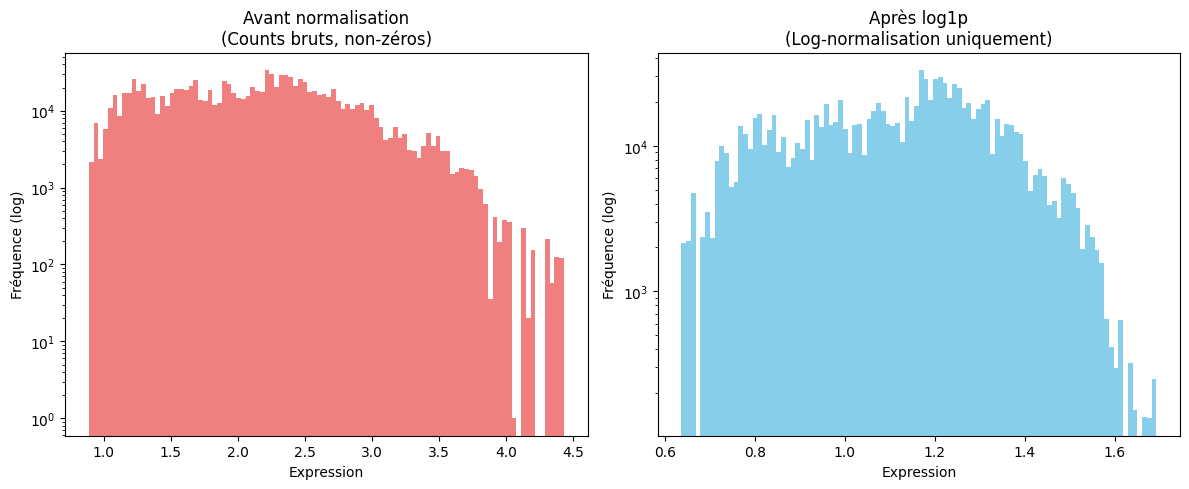

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Données
X_dense = X_train.toarray().astype(float)

# 2️⃣ Log-normalisation UNIQUEMENT
X_log = np.log1p(X_dense)

# 3️⃣ Histogrammes (valeurs individuelles, non-zéros)
X_before = X_dense[X_dense > 0]
X_after = X_log[X_log > 0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X_before, bins=100, log=True, color="lightcoral")
plt.title("Avant normalisation\n(Counts bruts, non-zéros)")
plt.xlabel("Expression")
plt.ylabel("Fréquence (log)")

plt.subplot(1, 2, 2)
plt.hist(X_after, bins=100, log=True, color="skyblue")
plt.title("Après log1p\n(Log-normalisation uniquement)")
plt.xlabel("Expression")
plt.ylabel("Fréquence (log)")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# -----------------------------
# 1️⃣ Données brutes
# -----------------------------
X_dense = X_train.toarray().astype(float)
#X_dense = X_train.toarray()

# =============================
# Résumé AVANT log-normalisation
# =============================
summary_before = pd.DataFrame({
    "min": [X_dense.min()],
    "max": [X_dense.max()],
    "mean": [X_dense.mean()],
    "median": [np.median(X_dense)],
    "std": [X_dense.std()],
    "sparsity": [(X_dense == 0).sum() / X_dense.size]
})

print("Résumé AVANT log-normalisation :")
print(summary_before)

# Sparsité globale (version explicite, comme tu fais)
total_values = X_dense.shape[0] * X_dense.shape[1]
num_nonzero = np.count_nonzero(X_dense)
num_zeros = total_values - num_nonzero
sparsity = num_zeros / total_values

#print(f"Nombre total de zéros : {num_zeros:,}")
#print(f"Proportion de zéros (sparsité) : {sparsity:.2%}")

# -----------------------------
# 2️⃣ Log-normalisation UNIQUEMENT
# -----------------------------
X_log = np.log1p(X_dense)

# =============================
# Résumé APRÈS log-normalisation
# =============================
summary_after = pd.DataFrame({
    "min": [X_log.min()],
    "max": [X_log.max()],
    "mean": [X_log.mean()],
    "median": [np.median(X_log)],
    "std": [X_log.std()],
    "sparsity": [(X_log == 0).sum() / X_log.size]
})

print("\nRésumé APRÈS log-normalisation (log1p uniquement) :")
print(summary_after)


Résumé AVANT log-normalisation :
   min     max     mean  median       std  sparsity
0  0.0  3260.0  0.24604     0.0  3.538571  0.919478

Résumé APRÈS log-normalisation (log1p uniquement) :
   min       max      mean  median       std  sparsity
0  0.0  8.089789  0.081584     0.0  0.325865  0.919478


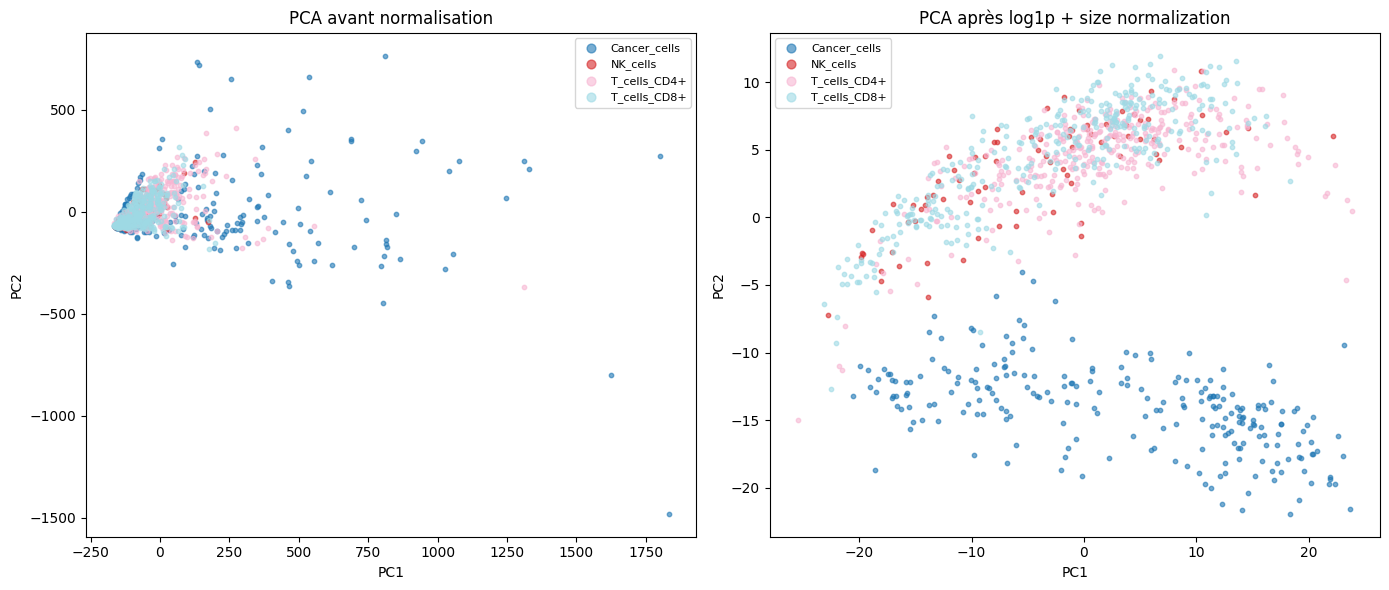

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# -----------------------------
# 1️⃣ Données
# -----------------------------
X_dense = X_train.toarray()

# Supposons que y_train contient les types cellulaires
y = np.array(y_train)  # vecteur de labels

# Créer un dictionnaire pour couleurs différentes pour chaque type
cell_types = np.unique(y)
colors = plt.cm.tab20(np.linspace(0, 1, len(cell_types)))
color_dict = {ctype: colors[i] for i, ctype in enumerate(cell_types)}
point_colors = np.array([color_dict[ctype] for ctype in y])

# -----------------------------
# 2️⃣ Log-normalisation
# -----------------------------
scale_factor = 1e4
cell_sums = X_dense.sum(axis=1, keepdims=True)
X_norm = X_dense / cell_sums * scale_factor

# 3️⃣ Log1p transformation
X_log = np.log1p(X_norm)  
#X_log = np.log1p(X_dense)


# -----------------------------
# 3️⃣ PCA
# -----------------------------
pca = PCA(n_components=2)

X_pca_before = pca.fit_transform(X_dense)
X_pca_after = pca.fit_transform(X_log)

# -----------------------------
# 4️⃣ Visualisation
# -----------------------------
plt.figure(figsize=(14,6))

# PCA avant log-normalisation
plt.subplot(1,2,1)
for ctype in cell_types:
    mask = y == ctype
    plt.scatter(X_pca_before[mask,0], X_pca_before[mask,1],
                s=10, alpha=0.6, color=color_dict[ctype], label=ctype)
plt.title("PCA avant normalisation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, fontsize=8)

# PCA après log-normalisation
plt.subplot(1,2,2)
for ctype in cell_types:
    mask = y == ctype
    plt.scatter(X_pca_after[mask,0], X_pca_after[mask,1],
                s=10, alpha=0.6, color=color_dict[ctype], label=ctype)
plt.title("PCA après log1p + size normalization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, fontsize=8)

plt.tight_layout()
plt.show()


# Test 

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import lightgbm as lgb


 
 
class RNAseqPreprocessor:
    def __init__(self, n_top_genes=5000):
        """
        Préprocesseur RNA-seq :
        - Normalisation library size
        - Log1p
        - Sélection des gènes les plus variables
        """
        self.n_top_genes = n_top_genes
        self.var_genes_idx = None
 
    def fit(self, X, y=None):
        # Sparse -> dense
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)
 
        # 1️⃣ Normalisation par cellule + log1p
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
 
        # 2️⃣ Gènes les plus variables
        sc.pp.highly_variable_genes(adata, n_top_genes=self.n_top_genes)
        self.var_genes_idx = np.where(adata.var['highly_variable'])[0]
 
        # 3️⃣ Transformation finale
        self.X_train_ = adata[:, self.var_genes_idx].X
        self.y_train_ = y
        return self
 
    def transform(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)
 
        # Normalisation + log1p
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
 
        # Gènes variables
        X_sel = adata[:, self.var_genes_idx].X
        return X_sel
 
 
class Classifier:
    def __init__(self, n_top_genes=5000):
        # Préprocesseur RNA-seq
        self.preprocessor = RNAseqPreprocessor(n_top_genes=n_top_genes)
 
        # Étape 1 : Cancer_cells vs autres
        self.cancer_detector = Pipeline([
           # ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                class_weight="balanced",
                max_iter=2000,
                solver="lbfgs",
                multi_class="auto"
            ))
        ])



        self.non_cancer_classifier = Pipeline([
           # ("scaler", StandardScaler()),       # standardisation
            ("pca", PCA(n_components=60)),      # réduction de dimension
            ("lgbm", lgb.LGBMClassifier(
                n_estimators=600,              # nombre d’arbres
                learning_rate=0.05,             # vitesse d’apprentissage
                max_depth=10,                   # profondeur max des arbres
                class_weight='balanced',       # gère automatiquement les classes rares
                random_state=42,
                n_jobs=-1,
                verbose=-1 
            ))
        ])
 
    def fit(self, X_sparse, y):
        # Prétraitement RNA-seq
        X = self.preprocessor.fit(X_sparse, y).transform(X_sparse)
        y = np.array(y)

        # Masques Cancer / Non-cancer
        mask_cancer = y == "Cancer_cells"
        mask_other = ~mask_cancer

        # Étape 1 : détecteur binaire
        self.cancer_detector.fit(X, mask_cancer)

        # Étape 2 : classifier les autres classes directement, sans oversampling
        X_non_cancer = X[mask_other]
        y_non_cancer = y[mask_other]

        self.non_cancer_classifier.fit(X_non_cancer, y_non_cancer)
        return self

 
    def predict(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        is_cancer = self.cancer_detector.predict(X)
 
        final_pred = []
        for i, cancer in enumerate(is_cancer):
            if cancer:
                final_pred.append("Cancer_cells")
            else:
                final_pred.append(
                    self.non_cancer_classifier.predict(X[i].reshape(1, -1))[0]
                )
        return np.array(final_pred)
 
    def predict_proba(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        prob_cancer = self.cancer_detector.predict_proba(X)[:, 1]
        prob_non_cancer = self.non_cancer_classifier.predict_proba(X)
 
        final_prob = []
        for i, pc in enumerate(prob_cancer):
            if pc >= 0.5:
                final_prob.append([pc] + [0] * prob_non_cancer.shape[1])
            else:
                probs = prob_non_cancer[i] * (1 - pc)
                final_prob.append([1 - np.sum(probs)] + list(probs))
        return np.array(final_prob)
 
 

In [14]:
import numpy as np
import scanpy as sc

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import lightgbm as lgb
from sklearn.svm import SVC


# ======================================================
# RNA-seq Preprocessor
# ======================================================
class RNAseqPreprocessor:
    def __init__(self, n_top_genes=2000):
        self.n_top_genes = n_top_genes
        self.var_genes_idx = None

    def fit(self, X, y=None):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)

        sc.pp.highly_variable_genes(
            adata, n_top_genes=self.n_top_genes
        )
        self.var_genes_idx = np.where(adata.var["highly_variable"])[0]
        return self

    def transform(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        adata = sc.AnnData(X)

        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        

        return adata[:, self.var_genes_idx].X


# ======================================================
# Hierarchical Classifier (avec Pipelines)
# ======================================================
class Classifier:
    def __init__(self, n_top_genes=2000):
        self.preprocessor = RNAseqPreprocessor(n_top_genes)

        # 1️⃣ Cancer vs Autres
        self.cancer_detector = Pipeline([
            ("svc", SVC(
                kernel='linear',                  # Utilisation du noyau RBF (non linéaire)
                C=0.1,                         # Paramètre de régularisation
                class_weight='balanced',        # Pondération des classes déséquilibrées
                random_state=42,                # Pour la reproductibilité
                probability=True,               # Pour obtenir des probabilités avec predict_proba
                max_iter=2000                   # Limite du nombre d'itérations
            ))
        ])


        self.nk_t_detector = Pipeline([
           # ("scaler", StandardScaler()), 
            ("lgb",lgb.LGBMClassifier(
                n_estimators=2000,
                learning_rate=0.05,
                max_depth=9,
                num_leaves=20,
                class_weight='balanced',   
                reg_alpha=0.7,
                reg_lambda=0.3,
                scale_pos_weight=678 / 85,
                random_state=42,
                verbose=-1,
                n_jobs=-1
            ))
        ])


        # 2️⃣ NK vs T
       # self.nk_t_detector = Pipeline([
          #  ("scaler", StandardScaler()),
        #    ("clf", LogisticRegression(
        #        class_weight="balanced",
        #        max_iter=2000,
        #        penalty='l2',     # Ridge (L2) classique
        #        C=0.05,
        #        solver="lbfgs",
        #        multi_class="auto"
         #   ))
       # ])

        # 3️⃣ CD4 vs CD8
        self.cd4_cd8_detector = Pipeline([
            ("svc", SVC(
                kernel='linear',                  # Utilisation du noyau RBF (non linéaire)
                C=0.1,                         # Paramètre de régularisation
                class_weight='balanced',        # Pondération des classes déséquilibrées
                random_state=42,                # Pour la reproductibilité
                probability=True,               # Pour obtenir des probabilités avec predict_proba
                max_iter=2000                   # Limite du nombre d'itérations
            ))
        ])

        # flags sécurité CV
        self.has_nk_t = False
        self.has_cd4_cd8 = False

    # ==================================================
    def fit(self, X_sparse, y):
        X = self.preprocessor.fit(X_sparse, y).transform(X_sparse)
        y = np.array(y)

        # -------- 1️⃣ Cancer vs Autres
        is_cancer = (y == "Cancer_cells")
        self.cancer_detector.fit(X, is_cancer)

        # -------- Autres cellules
        X_other = X[~is_cancer]
        y_other = y[~is_cancer]

        # -------- 2️⃣ NK vs T
        mask_nk = (y_other == "NK_cells")
        mask_t = np.isin(y_other, ["T_cells_CD4+", "T_cells_CD8+"])

        X_nk_t = X_other[mask_nk | mask_t]
        y_nk_t = mask_nk[mask_nk | mask_t]  # NK=True, T=False

        if len(np.unique(y_nk_t)) == 2:
            self.nk_t_detector.fit(X_nk_t, y_nk_t)
            self.has_nk_t = True
        else:
            self.has_nk_t = False

        # -------- 3️⃣ CD4 vs CD8
        X_t = X_other[mask_t]
        y_t = y_other[mask_t]

        y_cd4 = (y_t == "T_cells_CD4+")

        if len(np.unique(y_cd4)) == 2:
            self.cd4_cd8_detector.fit(X_t, y_cd4)
            self.has_cd4_cd8 = True
        else:
            self.has_cd4_cd8 = False

        return self

    # ==================================================
    def predict(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        preds = []

        is_cancer = self.cancer_detector.predict(X)

        for i, cancer in enumerate(is_cancer):
            if cancer:
                preds.append("Cancer_cells")
                continue

            # NK vs T
            if self.has_nk_t:
                is_nk = self.nk_t_detector.predict(X[i].reshape(1, -1))[0]
            else:
                is_nk = False

            if is_nk:
                preds.append("NK_cells")
                continue

            # CD4 vs CD8
            if self.has_cd4_cd8:
                is_cd4 = self.cd4_cd8_detector.predict(X[i].reshape(1, -1))[0]
                preds.append("T_cells_CD4+" if is_cd4 else "T_cells_CD8+")
            else:
                preds.append("T_cells_CD4+")

        return np.array(preds)
    

    def predict_proba(self, X_sparse):
        X = self.preprocessor.transform(X_sparse)
        n = X.shape[0]

    # Ordre FIXE des classes
        classes = [
            "Cancer_cells",
            "NK_cells",
            "T_cells_CD4+",
            "T_cells_CD8+"
        ]

        proba = np.zeros((n, len(classes)))

    # =========================
    # 1️⃣ Cancer vs Autres
    # =========================
        p_cancer = self.cancer_detector.predict_proba(X)[:, 1]
        p_other = 1.0 - p_cancer

    # =========================
    # 2️⃣ NK vs T
    # =========================
        if self.has_nk_t:
            p_nk = self.nk_t_detector.predict_proba(X)[:, 1]
            p_t = 1.0 - p_nk
        else:
        # fallback CV
            p_nk = np.zeros(n)
            p_t = np.ones(n)

    # =========================
    # 3️⃣ CD4 vs CD8
    # =========================
        if self.has_cd4_cd8:
            p_cd4 = self.cd4_cd8_detector.predict_proba(X)[:, 1]
            p_cd8 = 1.0 - p_cd4
        else:
        # fallback CV
            p_cd4 = np.ones(n)
            p_cd8 = np.zeros(n)

    # =========================
    # 🔗 Combinaison hiérarchique
    # =========================
        proba[:, 0] = p_cancer
        proba[:, 1] = p_other * p_nk
        proba[:, 2] = p_other * p_t * p_cd4
        proba[:, 3] = p_other * p_t * p_cd8

        return proba


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix)
 
 
def preprocess_X(X_sparse):
    """
    Preprocessing RNA-seq standard :
    - log1p
    - normalisation par cellule (library size)
    """
    X = X_sparse.toarray()
 
    # Log transform
    X = np.log1p(X)
 
    # Library size normalization
    X = X / (X.sum(axis=1, keepdims=True) + 1e-8)
 
    return X
 
 
class Classifier(object):
    def __init__(self):
        self.pipe = Pipeline([
            ("scaler", StandardScaler(with_mean=True, with_std=True)),
            ("select", SelectKBest(
                score_func=f_classif,
                k=2000  #  à ajuster (1000–5000)
            )),
            ("clf", LogisticRegression(
                penalty="l1",
                solver="saga",
                C=1.0,
                class_weight="balanced",
                max_iter=5000,
                n_jobs=-1
            ))
        ])
 
    def fit(self, X_sparse, y):
        X = preprocess_X(X_sparse)
        self.pipe.fit(X, y)
        return self
 
    def predict(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict(X)
 
    def predict_proba(self, X_sparse):
        X = preprocess_X(X_sparse)
        return self.pipe.predict_proba(X)
 


===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  249   508   818  1125  1450  1580  1621  1686  2300  2402  2441  3156
  3405  3871  4050  4353  4471  4839  5547  6088  7882  7984  8088  8414
  8763  8822  9659  9693  9720 10241 10391 10541 10823 11225 11359 11417
 11430 11774 11860 12231 12270 12497 13008 13204 13247] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 1): 0.8587

===== Fold 2/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  286   515   710   845  1466  1558  1594  2607  2820  2845  3769  3865
  4112  4156  4338  4659  4906  5433  5825  5885  6006  7825  8357  9606
  9630 10125 10139 10918 11371 11608 12177 12764 12768 12819 13099] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 2): 0.8641

===== Fold 3/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   33   220   223   611  1016  1442  1606  2431  2433  2511  2594  3024
  3092  3176  3354  4166  4230  4714  5802  6775  7750  7913  8151  8712
  9592  9639  9730  9969 10047 10150 10583 10593 10840 11414 11745 13468] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 3): 0.8055

===== Fold 4/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  216   247   621   856  1370  1814  1830  2569  2827  2836  2853  3743
  4066  4361  4668  4671  4788  5286  6194  6717  7133  7476  7756  7969
  9557  9584  9610  9905 10038 10087 10370 11365 12225 12677 12684 12762
 12963 13249 13418] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 4): 0.8531

===== Fold 5/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   76  1576  1659  1664  1907  2001  2650  3101  3390  3856  4055  4510
  4513  4996  5174  5392  5607  5895  6053  6055  6098  6156  7975  8034
  8427  9201  9451  9575  9675  9687  9692 11052 11376 11602 11727 11881
 12237 12822 12872 13443] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Balanced accuracy (fold 5): 0.8570

GLOBAL RESULTS (ALL FOLDS)
Mean Balanced Accuracy: 0.8476724772502509
Std Balanced Accuracy: 0.021379535231555304

Classification Report (global):
              precision    recall  f1-score   support

Cancer_cells       0.99      0.97      0.98       237
    NK_cells       0.69      0.73      0.71        85
T_cells_CD4+       0.86      0.88      0.87       336
T_cells_CD8+       0.83      0.81      0.82       342

    accuracy                           0.86      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.87      0.86      0.87      1000



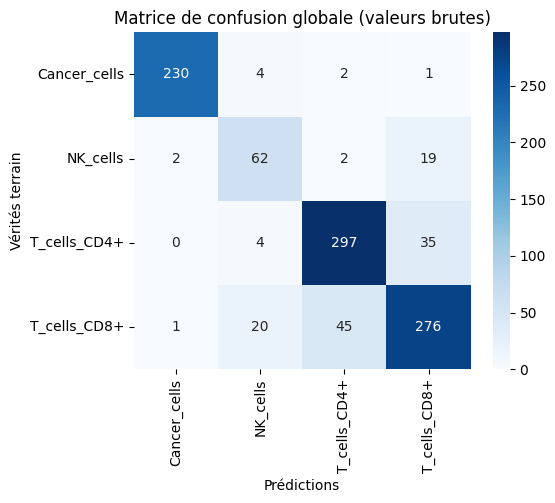

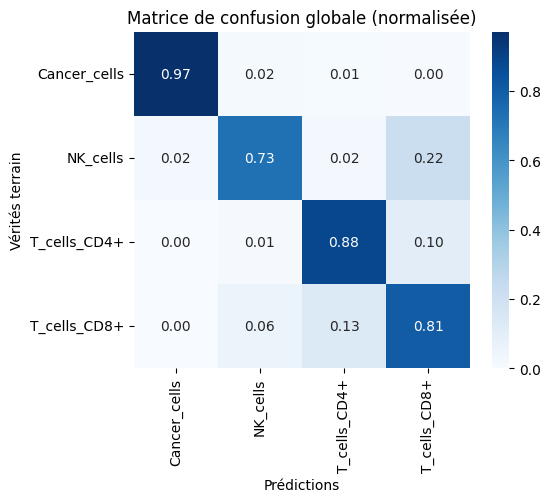

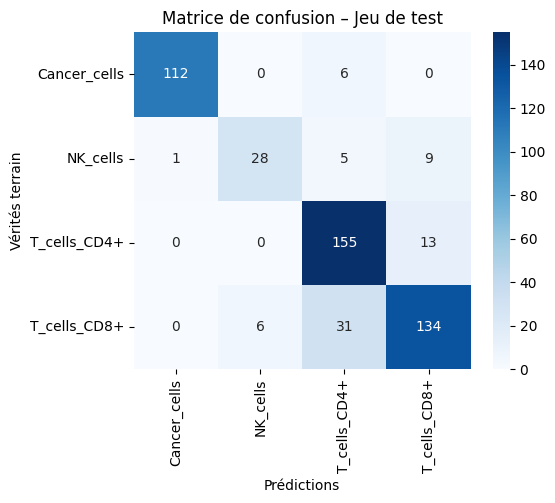

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report,
    balanced_accuracy_score,
    confusion_matrix
)

# ======================================================
# OUTIL : JOLIE MATRICE DE CONFUSION
# ======================================================
def plot_confusion_matrix(
    y_true,
    y_pred,
    labels,
    normalize=False,
    title="Matrice de confusion",
    cmap="Blues"
):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap=cmap,
        xticklabels=labels,
        yticklabels=labels,
        square=True,
        cbar=True
    )
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités terrain")
    plt.title(title)
    plt.tight_layout()
    plt.show()


# ======================================================
# CROSS-VALIDATION
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)

    # === MATRICES DE CONFUSION ===
    plot_confusion_matrix(
        all_y_true,
        all_y_pred,
        labels=labels,
        normalize=False,
        title="Matrice de confusion globale (valeurs brutes)"
    )

    plot_confusion_matrix(
        all_y_true,
        all_y_pred,
        labels=labels,
        normalize=True,
        title="Matrice de confusion globale (normalisée)"
    )

    return bal_acc_scores


# ======================================================
# UTILISATION
# ======================================================
scores = cross_validate_classifier(X_train, y_train, n_splits=5)

clf = Classifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Matrice de confusion sur le jeu de test
plot_confusion_matrix(
    y_test,
    y_pred,
    labels=np.unique(y_test),
    normalize=False,
    title="Matrice de confusion – Jeu de test"
)


In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix, accuracy_score

# ======================================================
# 3. CROSS-VALIDATION EXEMPLE
# ======================================================
def cross_validate_classifier(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    bal_acc_scores = []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n===== Fold {fold}/{n_splits} =====")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        clf = Classifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_val)

        bal_acc = balanced_accuracy_score(y_val, y_pred)
        bal_acc_scores.append(bal_acc)

        print(f"Balanced accuracy (fold {fold}): {bal_acc:.4f}")

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    print("\n==============================")
    print("GLOBAL RESULTS (ALL FOLDS)")
    print("==============================")

    print("Mean Balanced Accuracy:", np.mean(bal_acc_scores))
    print("Std Balanced Accuracy:", np.std(bal_acc_scores))

    print("\nClassification Report (global):")
    print(classification_report(all_y_true, all_y_pred))

    labels = np.unique(y)
    cm = confusion_matrix(all_y_true, all_y_pred, labels=labels)
    print("Confusion Matrix (global):")
    print(cm)

    return bal_acc_scores

# ======================================================
# 4. UTILISATION (EXEMPLE)
# ======================================================
scores = cross_validate_classifier(X_test, y_test, n_splits=5)
clf = Classifier()
clf.fit(X_test, y_test)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)



===== Fold 1/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy (fold 1): 0.8734

===== Fold 2/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy (fold 2): 0.9155

===== Fold 3/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy (fold 3): 0.8750

===== Fold 4/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy (fold 4): 0.8767

===== Fold 5/5 =====


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy (fold 5): 0.8599

GLOBAL RESULTS (ALL FOLDS)
Mean Balanced Accuracy: 0.8800774188926402
Std Balanced Accuracy: 0.018670149901531055

Classification Report (global):
              precision    recall  f1-score   support

Cancer_cells       1.00      0.99      0.99       237
    NK_cells       0.76      0.82      0.79        85
T_cells_CD4+       0.87      0.88      0.88       336
T_cells_CD8+       0.85      0.82      0.83       342

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.87      1000
weighted avg       0.88      0.88      0.88      1000

Confusion Matrix (global):
[[235   0   1   1]
 [  0  70   2  13]
 [  0   2 297  37]
 [  1  20  40 281]]


/Users/eliko/Documents/M2DS/Data Comp/scmark-classification-team_avengers/venAvenger/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
